In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon
from matplotlib import cm
from matplotlib.cm import ScalarMappable

### Constant

In [3]:
filtered_df_0 = constant_combined_df[(constant_combined_df['degree'] == 1) & (constant_combined_df['nu'] == 0.49)]
dofs_sqrt = np.sqrt(filtered_df_0['dofs'])
a =  dofs_sqrt.iloc[2]
print(a)

33.015148038438355


#### function

In [55]:
def plot_graph(ax, error_column, PoiRatio, colors, markers ,ylabel,data):
    # 按 nu 和 degree 分组，并绘制图表
    slope = []
    for i in PoiRatio:
        for j in range(1, 6):
            filtered_df_0 = data[(data['degree'] == j) & (data['nu'] == i)]
            dofs_sqrt = np.sqrt(filtered_df_0['dofs'])

            if len(filtered_df_0) < 3:
                print(f"Not enough data points for degree {j} and nu {i}. Skipping.")
                continue

            ax.plot(dofs_sqrt, filtered_df_0[error_column],
                    marker=markers[i], linestyle='-', color=colors[j], linewidth=1.0, markerfacecolor='none', markersize=15)
             
            dofs_point_1 = dofs_sqrt.iloc[0]
            dofs_point_2 = dofs_sqrt.iloc[1]
            dofs_point_3 = dofs_sqrt.iloc[2]

            error_point_1 = filtered_df_0.iloc[0][error_column]
            error_point_2 = filtered_df_0.iloc[1][error_column]
            error_point_3 = filtered_df_0.iloc[2][error_column]
            
            
            slopeEach = np.log(error_point_3/error_point_2) / np.log(dofs_point_3/dofs_point_2)
            slope.append(slopeEach)
    k  = [round(x) for x in slope[:5]]      
    print("Calculated slopes:", slope)
    #new_data = constant_combined_df[constant_combined_df['level'] == 0]

    #for i in PoiRatio:
    #    filtered_df = constant_combined_df[(constant_combined_df['level'] == 0) & (constant_combined_df['nu'] == i)]
    #    dofs_sqrt = np.sqrt(filtered_df['dofs'])
    #    ax.plot(dofs_sqrt, filtered_df[error_column],
    #            marker=markers[i], linestyle='-', color='black', linewidth=0.4, markerfacecolor='none')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('(#dofs)$^{1/2}$')
    ax.set_ylabel(ylabel)

    custom_lines = [
        Line2D([0], [0], color='black', marker=markers[nu], linestyle='None', markersize=20, label=rf'$\nu$ = {nu}', markerfacecolor='none')
    for nu in PoiRatio
    ]

    for j in range(1, 6):
        if k[j-1] == 0:
            continue
        else:
            filtered_df_03 = data[(data['degree'] == j) & (data['nu'] == 0.3)]
            dofs_sqrt_new = np.sqrt(filtered_df_03['dofs'])

             # 已知顶点1和顶点2
            x1 = dofs_sqrt_new.iloc[1] * 1.5
            x2 = x1 * 1.5

            y1 = filtered_df_03.iloc[1][error_column] * 1.01
            y2 = filtered_df_03.iloc[2][error_column] * 1.01

    # 计算第三个顶点 (x3, y3) 使得三角形为等腰直角
            x3 = x2
            d =  (x2/x1)**(-k[j-1])
            y3 = y1 / d

    # 定义三角形的三个顶点坐标
            x_coords_new = [x1, x3, x2, x1]  # 回到起点，闭合三角形
            y_coords_new = [y1, y3, y1, y1]

    # 绘制等腰直角三角形
            ax.plot(x_coords_new, y_coords_new, color='black', linewidth=0.8)

            midpoint_1_x = (x1+ x3) / 2 
            if k[j-1] > 0:
                midpoint_1_y = y1 /1.5
            else:
                midpoint_1_y = y1 *1.3

            midpoint_2_x = x2 +5
            midpoint_2_y = (y1 +y3) /2

        # 在直角边上分别添加数字
            ax.text(midpoint_1_x, midpoint_1_y, '1', fontsize=12, ha='center', va='center', color='black')  # 在第一条直角边上添加数字'1'
            ax.text(midpoint_2_x, midpoint_2_y, f'{-k[j-1]}', fontsize=12, ha='center', va='center', color='black')  # 在第二条直角边上添加数字'2'
        
    # 调整图例
    ax.legend(handles=custom_lines, loc='lower left', fontsize=20, ncol=1, handletextpad=0.4, columnspacing=0.5, bbox_to_anchor=(0, 0))
    ax.plot()
    return slope


#### error standard

In [49]:
# 读取CSV文件
constant_combined1 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/constant_degree1.csv')
constant_combined2 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/constant_degree2.csv')
constant_combined3 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/constant_degree3.csv')
constant_combined4 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/constant_degree4.csv')
constant_combined5 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/constant_degree5.csv')

# 将所有数据帧进行拼接
constant_combined_df = pd.concat([constant_combined1, constant_combined2, constant_combined3, constant_combined4, constant_combined5])

# 打印结果
print(constant_combined_df)


    degree   dofs  level        nu    E   gamma  errorStandard  errorStress
0        1     82      0  0.300000  1.0  1000.0   5.886672e-01     0.702818
1        1     82      0  0.490000  1.0  1000.0   1.008230e+00     2.155559
2        1     82      0  0.499900  1.0  1000.0   1.417115e+00     3.458457
3        1     82      0  0.499999  1.0  1000.0   1.425720e+00     3.485195
4        1     82      0  0.500000  1.0  1000.0   6.150900e-01     0.590859
..     ...    ...    ...       ...  ...     ...            ...          ...
10       5  20802      2  0.300000  1.0  1000.0   8.528285e-07     0.000001
11       5  20802      2  0.490000  1.0  1000.0   2.480688e-06     0.000006
12       5  20802      2  0.499900  1.0  1000.0   3.761175e-06     0.000010
13       5  20802      2  0.499999  1.0  1000.0   3.782012e-06     0.000010
14       5  20802      2  0.500000  1.0  1000.0   1.318616e-06     0.000001

[75 rows x 8 columns]


Calculated slopes: [-1.0211833293344557, -2.0153533178288607, -3.062458693599486, -4.023539013303068, -5.055851517331043, -0.189606120989469, -1.370163482834083, -2.5121491125241295, -4.15121560175899, -4.891506666627691, 0.8666692053864595, -0.22329971765342885, -1.2057054420407236, -4.214918477095905, -4.793514994204339, 1.004920810055407, -0.047372477289069376, -1.063834364622271, -4.215766054745178, -4.792200743601875, 0.9202713918101134, -0.08327777310680166, -1.091321778952215, -4.125248622642991, -4.899308060461082]


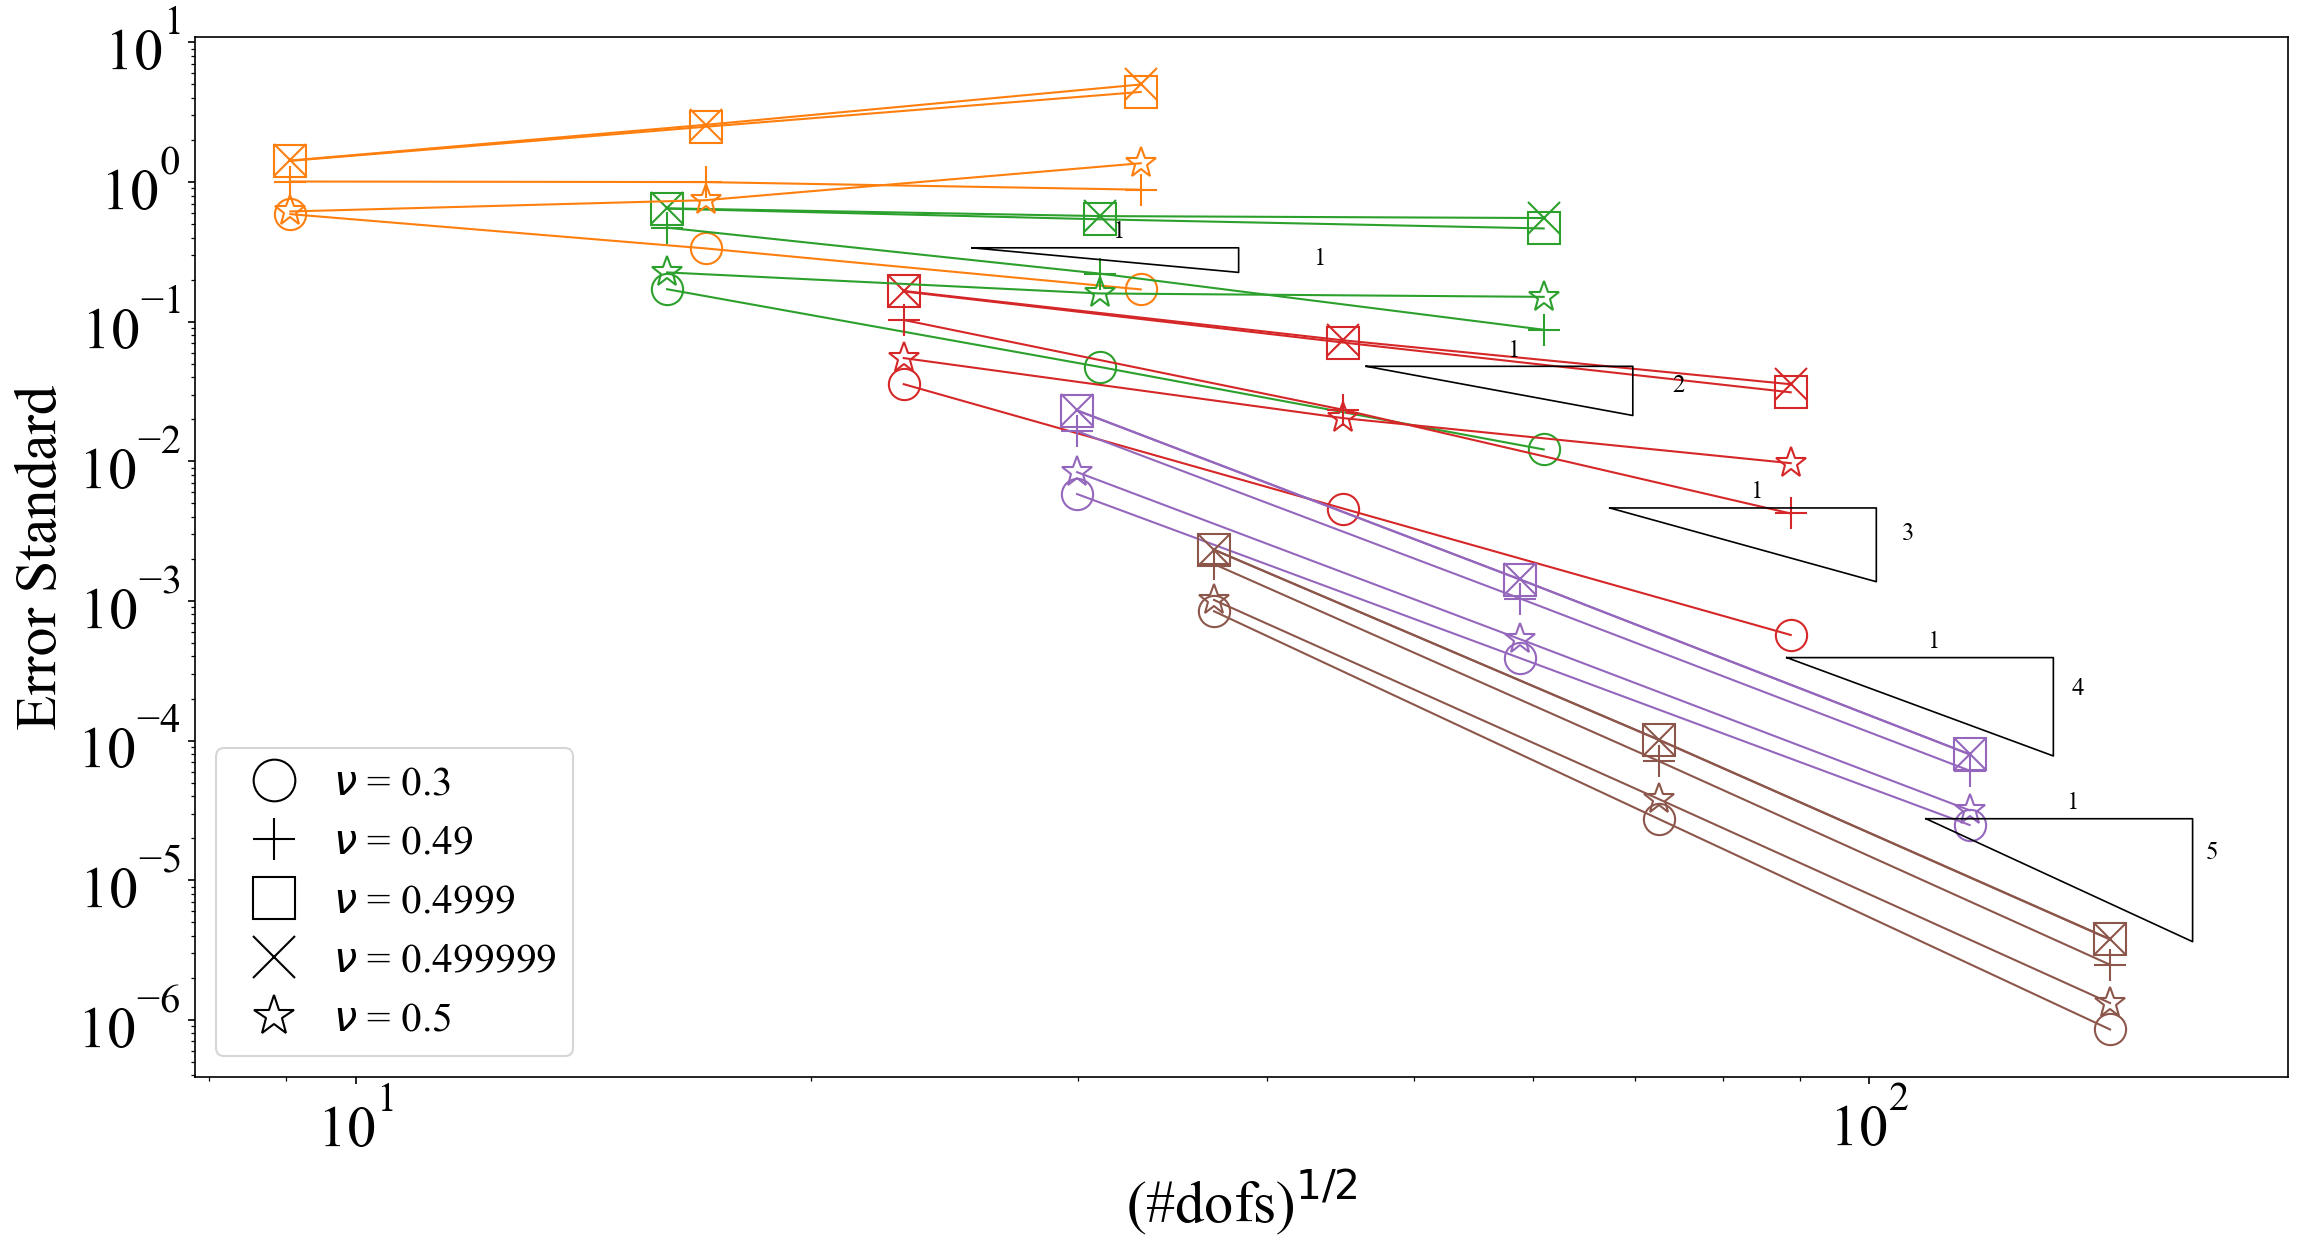

In [65]:

# 更新字体设置
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 28, 'text.usetex': False})
# 准备绘图
fig, ax1 = plt.subplots( figsize=(18,9), dpi=150)  # 设置宽度比例

PoiRatio = [0.3, 0.49, 0.4999, 0.499999, 0.5]
markers = {0.3: 'o', 0.49: '+', 0.4999: 's', 0.499999: 'x', 0.5: '*'}
colors = plt.get_cmap('tab10').colors
# colors = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6' , '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']

# 绘制第一张图，使用 errorStandard
slope1 = plot_graph(ax1, 'errorStandard',PoiRatio,colors,markers, 'Error Standard',constant_combined_df)


#### error stress

Calculated slopes: [-0.8336441275998399, -1.9190994850219958, -3.0037852430869063, -4.043870536351359, -5.039873058547927, -0.04077564030553908, -1.2720252393477685, -2.4386233426831128, -4.200646125313601, -4.830848964624302, 0.9280703772133465, -0.16748735381954521, -1.1673385188698597, -4.259127273078237, -4.746184835204042, 1.0663033365547772, 0.0071482211788494, -1.02557391794031, -4.259888694840735, -4.7450538671555735, 0.9718882129128816, -0.03286895705944529, -1.0552461127710295, -4.124132830727776, -4.896143903586722]


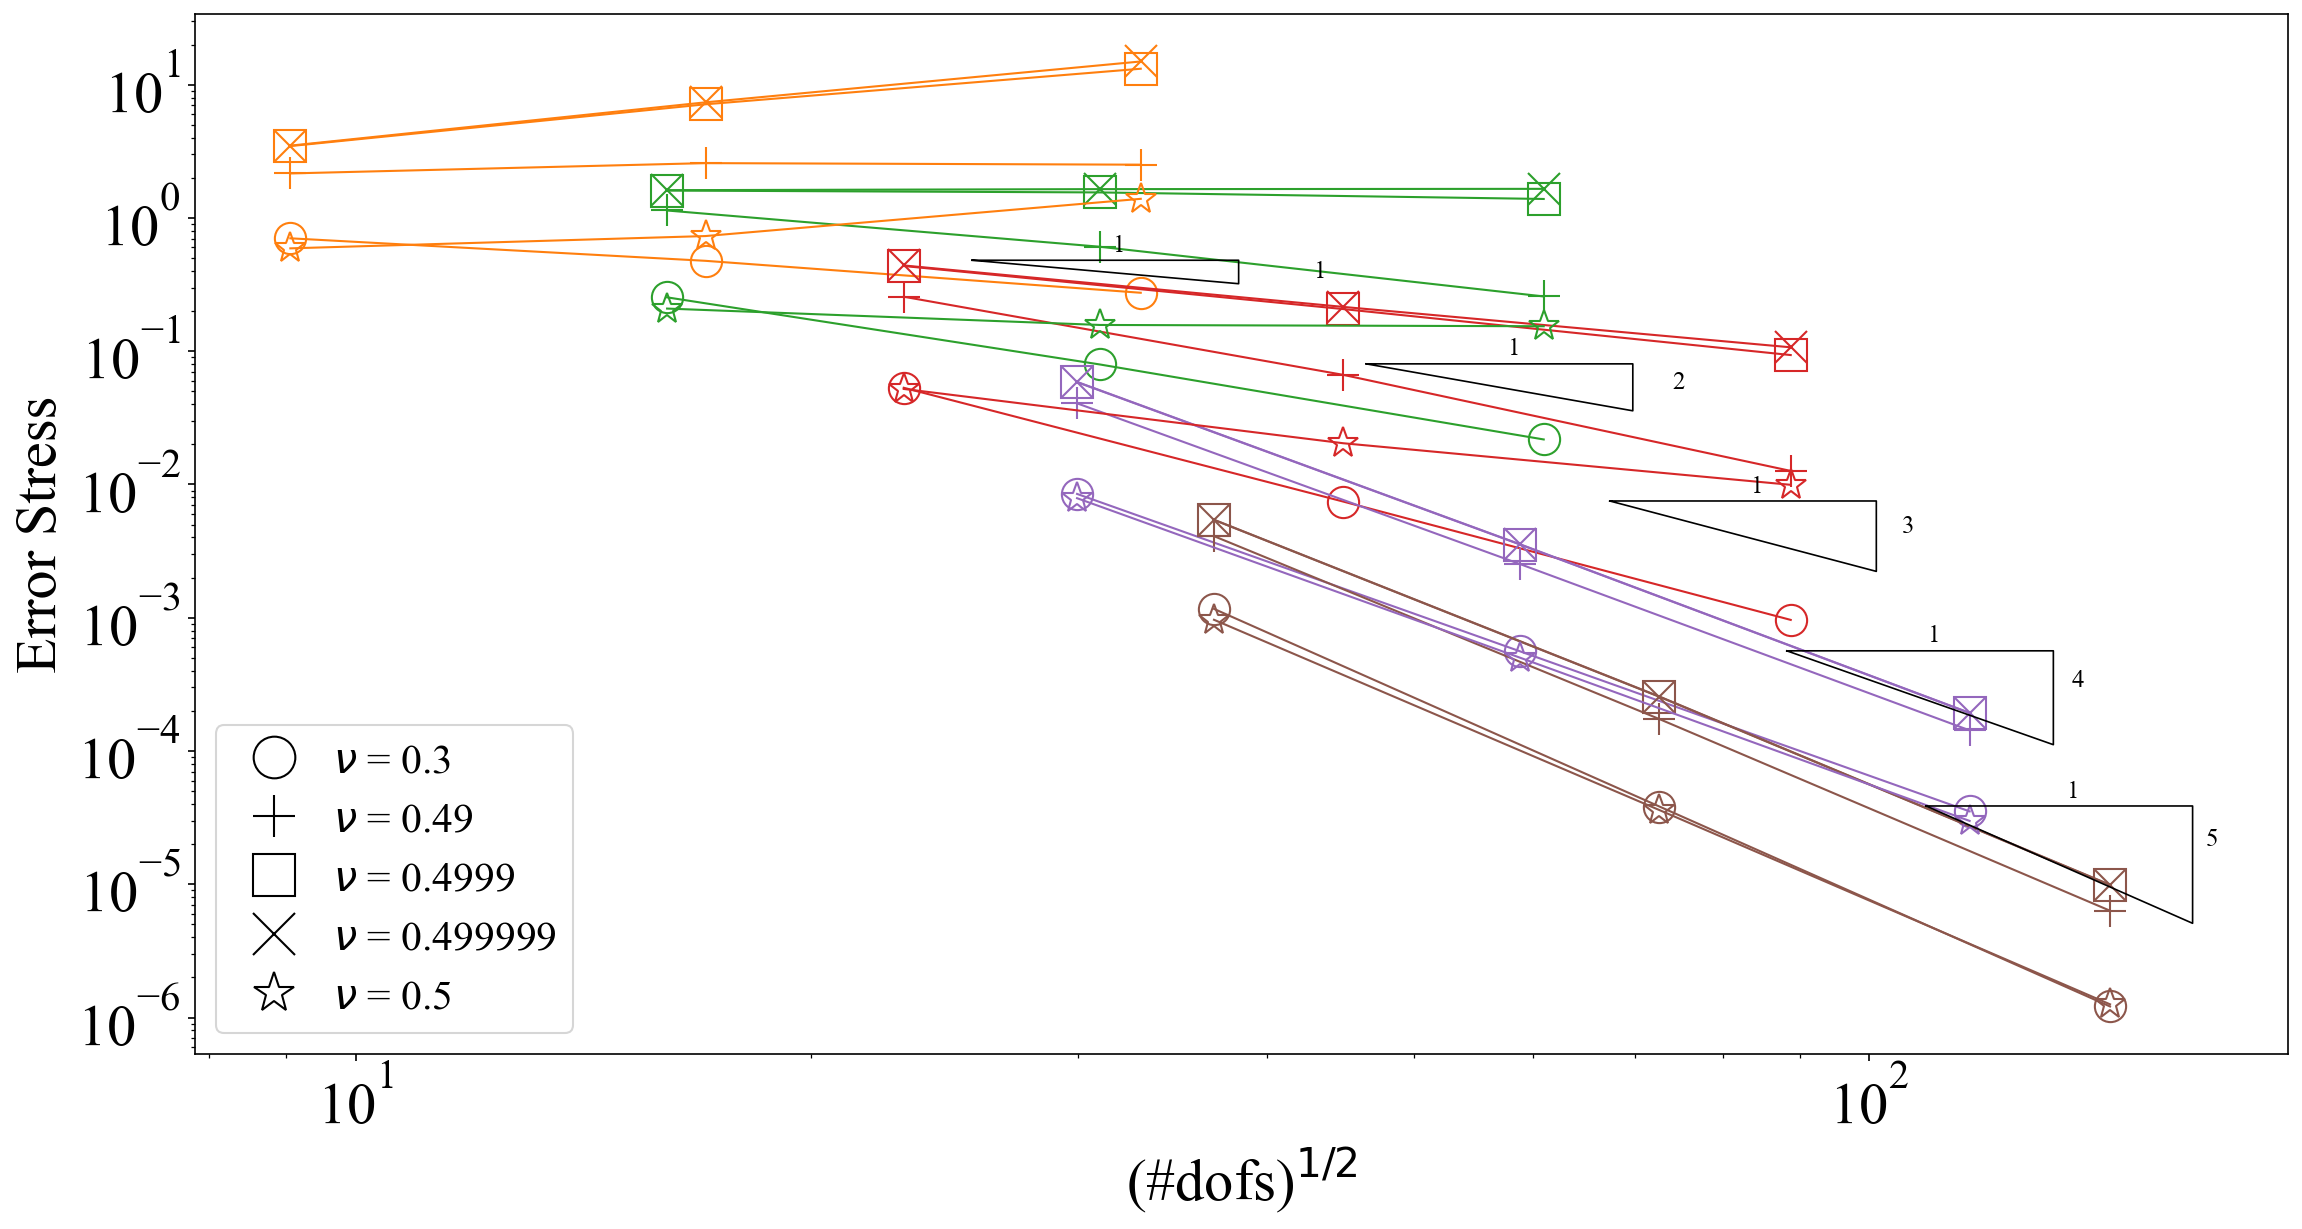

In [57]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 28, 'text.usetex': False})
# 准备绘图
fig, ax2 = plt.subplots( figsize=(18, 9), dpi=150)  # 设置宽度比例
# 绘制第二张图，使用 errorStress
slope2 = plot_graph(ax2, 'errorStress',PoiRatio,colors,markers, 'Error Stress',constant_combined_df)


#### error nu=0.3

Calculated slopes: [-1.0211833293344557, -2.0153533178288607, -3.062458693599486, -4.023539013303068, -5.055851517331043]
Calculated slopes: [-0.8336441275998399, -1.9190994850219958, -3.0037852430869063, -4.043870536351359, -5.039873058547927]


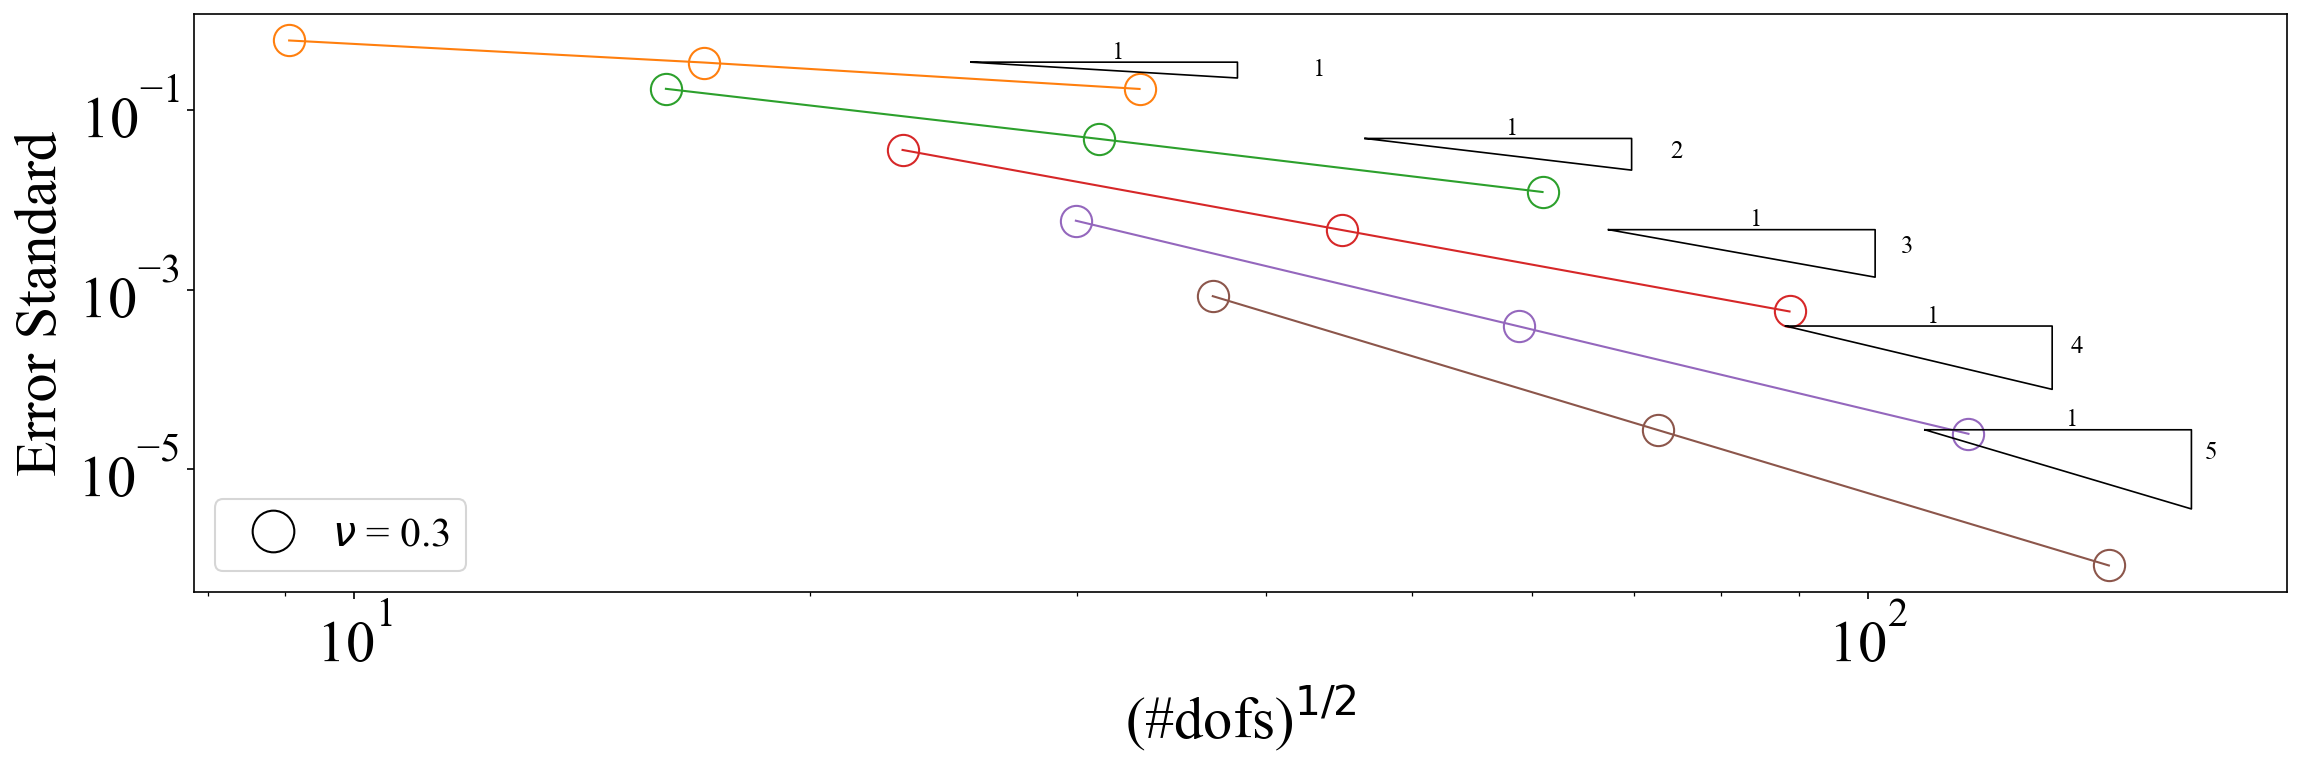

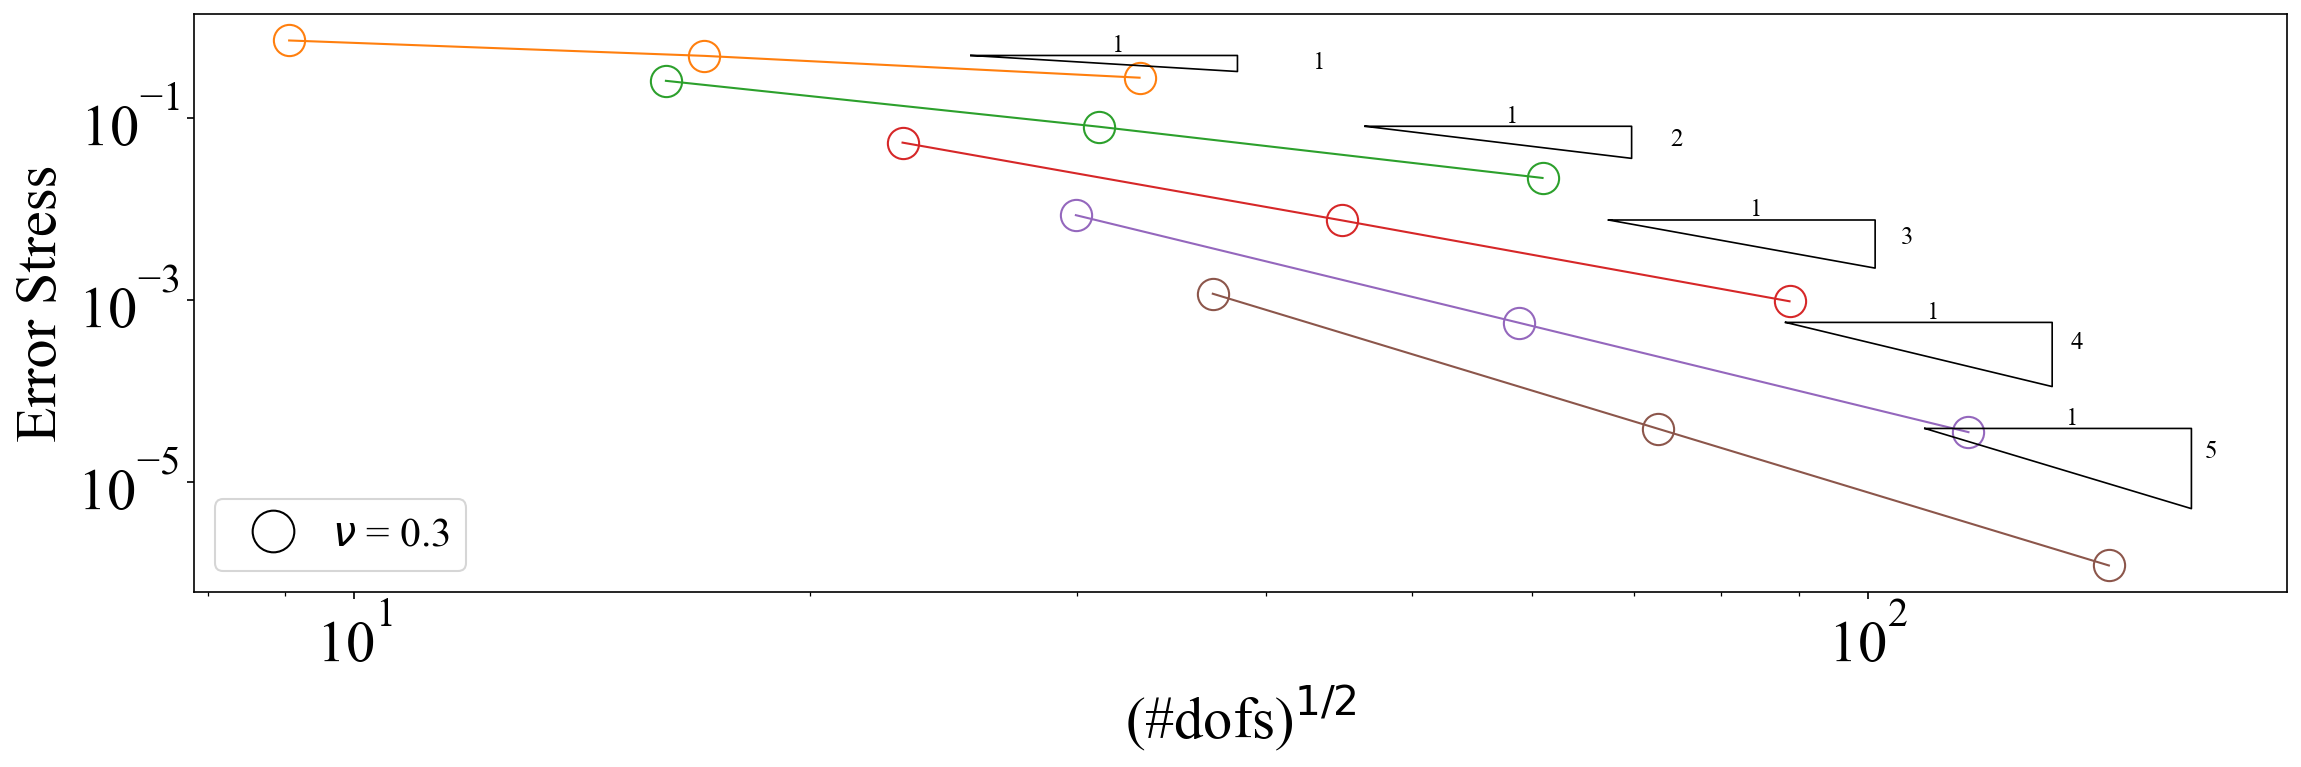

In [68]:

# 更新字体设置
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 28, 'text.usetex': False})
# 准备绘图
fig, ax3 = plt.subplots( figsize=(18,5), dpi=150)  # 设置宽度比例
fig, ax4 = plt.subplots( figsize=(18,5), dpi=150)
PoiRatio = [0.3]
markers = {0.3: 'o'}
colors = plt.get_cmap('tab10').colors
# colors = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6' , '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']

# 绘制第一张图，使用 errorStandard
slope1 = plot_graph(ax3, 'errorStandard',PoiRatio,colors,markers, 'Error Standard',constant_combined_df)
slope2 = plot_graph(ax4, 'errorStress',PoiRatio,colors,markers, 'Error Stress',constant_combined_df)

### bar

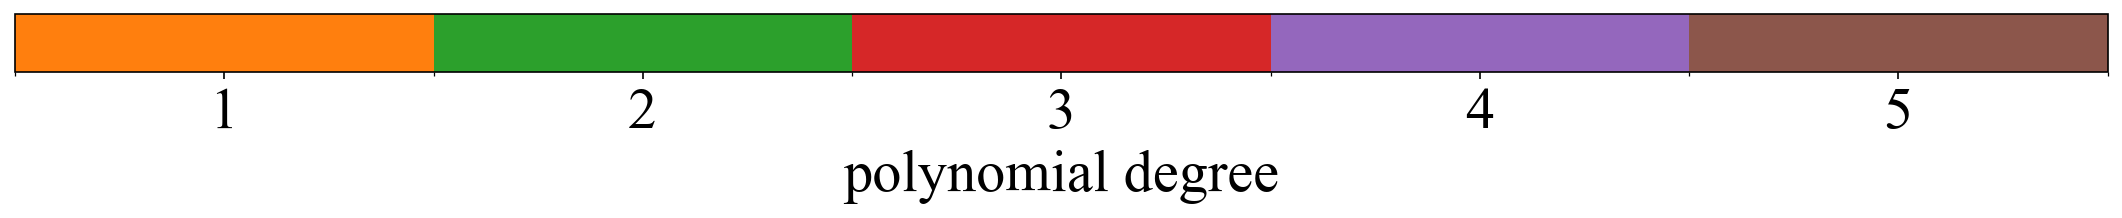

In [53]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 28, 'text.usetex': False})
# 准备绘图
fig, ax5 = plt.subplots( figsize=(18, 0.5), dpi=150)  # 设置宽度比例


cmap = mcolors.ListedColormap(colors[1:6])
norm = mcolors.BoundaryNorm(boundaries=range(1, 7), ncolors=5)

# 创建ScalarMappable对象
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # 必需的空数组

# 添加颜色条
cbar = plt.colorbar(sm, cax=ax5, orientation='horizontal',ticks=np.arange(1.5, 6.5, 1.0))
cbar.set_label('polynomial degree')
cbar.ax.set_xticklabels([f'{i}' for i in range(1, 6)])

plt.show()


### Inclusion

In [61]:
# 读取CSV文件
inclusion_combined1 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/inclusion_degree1.csv')
inclusion_combined2 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/inclusion_degree2.csv')
inclusion_combined3 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/inclusion_degree3.csv')
inclusion_combined4 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/inclusion_degree4.csv')
inclusion_combined5 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/inclusion_degree5.csv')

# 将所有数据帧进行拼接
inclusion_combined_df = pd.concat([inclusion_combined1,inclusion_combined2,inclusion_combined3,inclusion_combined4,inclusion_combined5])

# 打印结果
print(inclusion_combined_df)


    degree  level        nu   dofs  errorStandard   errorStress
0        1      0  0.300000    146   3.702632e-01  3.623076e-01
1        1      0  0.490000    146   3.794888e-01  3.650296e-01
2        1      0  0.499900    146   3.805716e-01  3.653344e-01
3        1      0  0.499999    146   3.805830e-01  3.653376e-01
4        1      1  0.300000    546   2.291453e-01  2.236855e-01
5        1      1  0.490000    546   3.042724e-01  3.021126e-01
6        1      1  0.499900    546   4.658683e-01  4.787034e-01
7        1      1  0.499999    546   4.707147e-01  4.840686e-01
8        1      2  0.300000   2114   2.754773e-01  2.934394e-01
9        1      2  0.490000   2114   3.319781e-01  3.567233e-01
10       1      2  0.499900   2114   8.457424e-01  9.313969e-01
11       1      2  0.499999   2114   8.890328e-01  9.799944e-01
0        2      0  0.300000    482   7.115201e-02  7.031082e-02
1        2      0  0.490000    482   7.483036e-02  7.208359e-02
2        2      0  0.499900    482   7.5

Not enough data points for degree 1 and nu 0.5. Skipping.
Not enough data points for degree 2 and nu 0.5. Skipping.
Not enough data points for degree 3 and nu 0.5. Skipping.
Not enough data points for degree 4 and nu 0.5. Skipping.
Not enough data points for degree 5 and nu 0.5. Skipping.
Calculated slopes: [0.27206378286521954, -1.7050044423563737, -2.4010148154099973, -3.995046354394705, -4.970787884847038, 0.12875007620827628, -1.3257980440212358, -2.3069820581485465, -3.9943106967883217, -4.947969494055902, 0.8809983659909966, -0.4644522118746153, -1.8289682980461015, -3.9871221666736907, -4.902101140141399, 0.9394596410915219, -0.4446100535961883, -1.8160303017984325, -3.9870051151744788, -4.901256762787793]


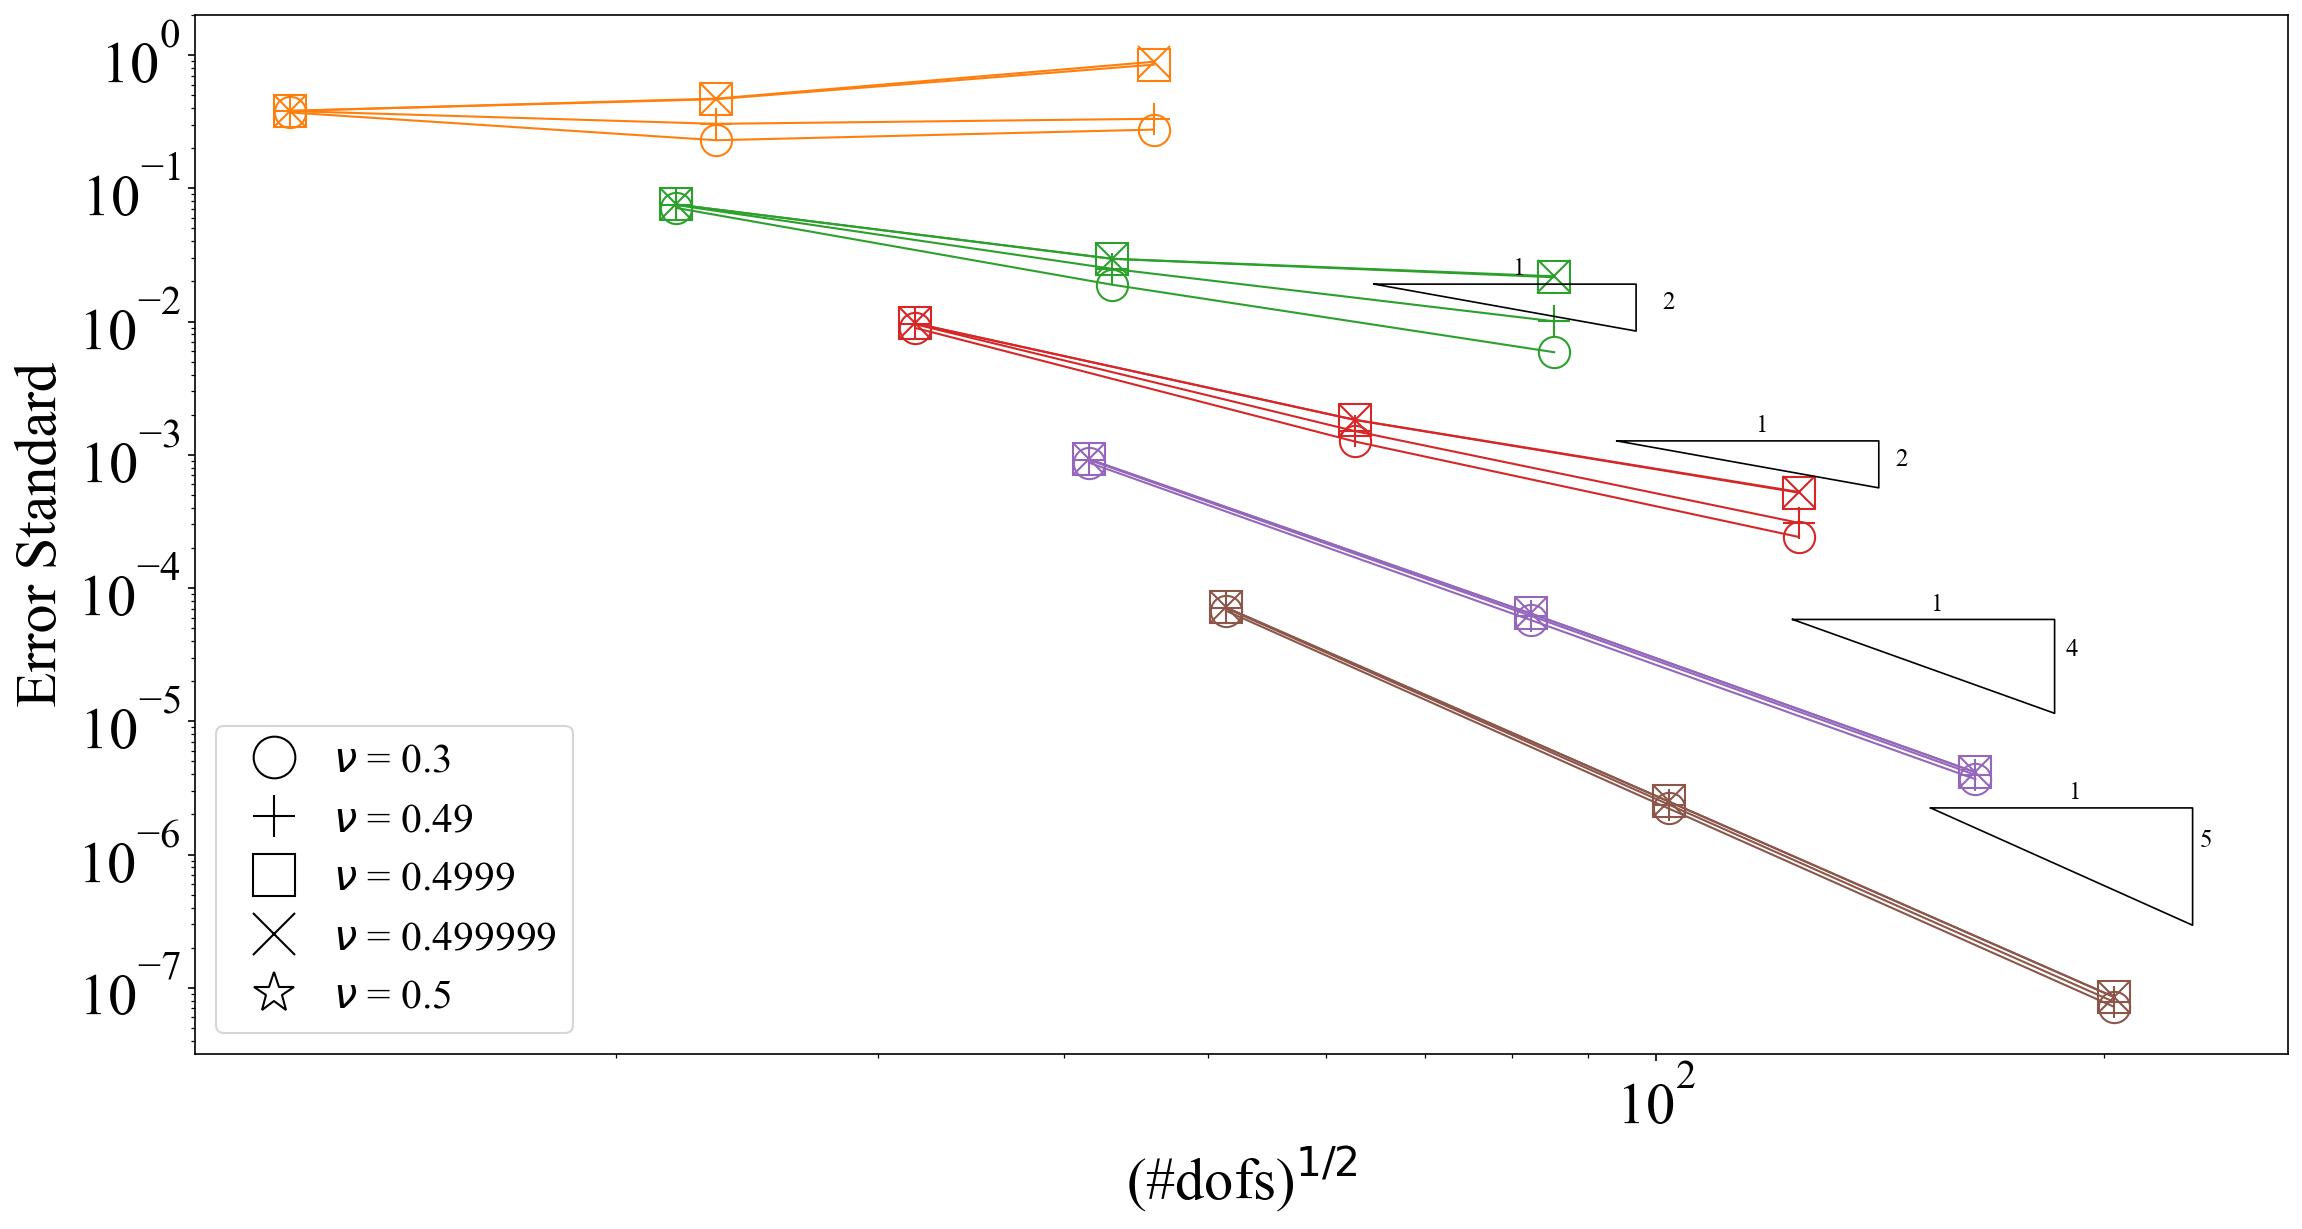

In [72]:
# 更新字体设置
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 28, 'text.usetex': False})
# 准备绘图
fig, ax1 = plt.subplots(figsize=(18, 9), dpi=150)  # 设置宽度比例
PoiRatio = [0.3, 0.49, 0.4999, 0.499999, 0.5]
markers = {0.3: 'o', 0.49: '+', 0.4999: 's', 0.499999: 'x', 0.5: '*'}
colors = plt.get_cmap('tab10').colors
# 绘制第一张图，使用 errorStandard
slope1 = plot_graph(ax1, 'errorStandard', PoiRatio,colors,markers,'Error Standard',inclusion_combined_df)


Not enough data points for degree 1 and nu 0.5. Skipping.
Not enough data points for degree 2 and nu 0.5. Skipping.
Not enough data points for degree 3 and nu 0.5. Skipping.
Not enough data points for degree 4 and nu 0.5. Skipping.
Not enough data points for degree 5 and nu 0.5. Skipping.
Calculated slopes: [0.4010142006806699, -1.6884089552655388, -2.343171375401497, -4.002224995767161, -4.976161813622342, 0.24548796037473095, -1.2105280785248362, -2.2175060555647907, -3.9973401919050393, -4.944981302856011, 0.983372044759889, -0.31653515192814435, -1.7306630308652016, -3.9900706848838987, -4.897362857667596, 1.042048946877193, -0.2963740696149687, -1.7177105086874722, -3.98995430434906, -4.896502280980406]


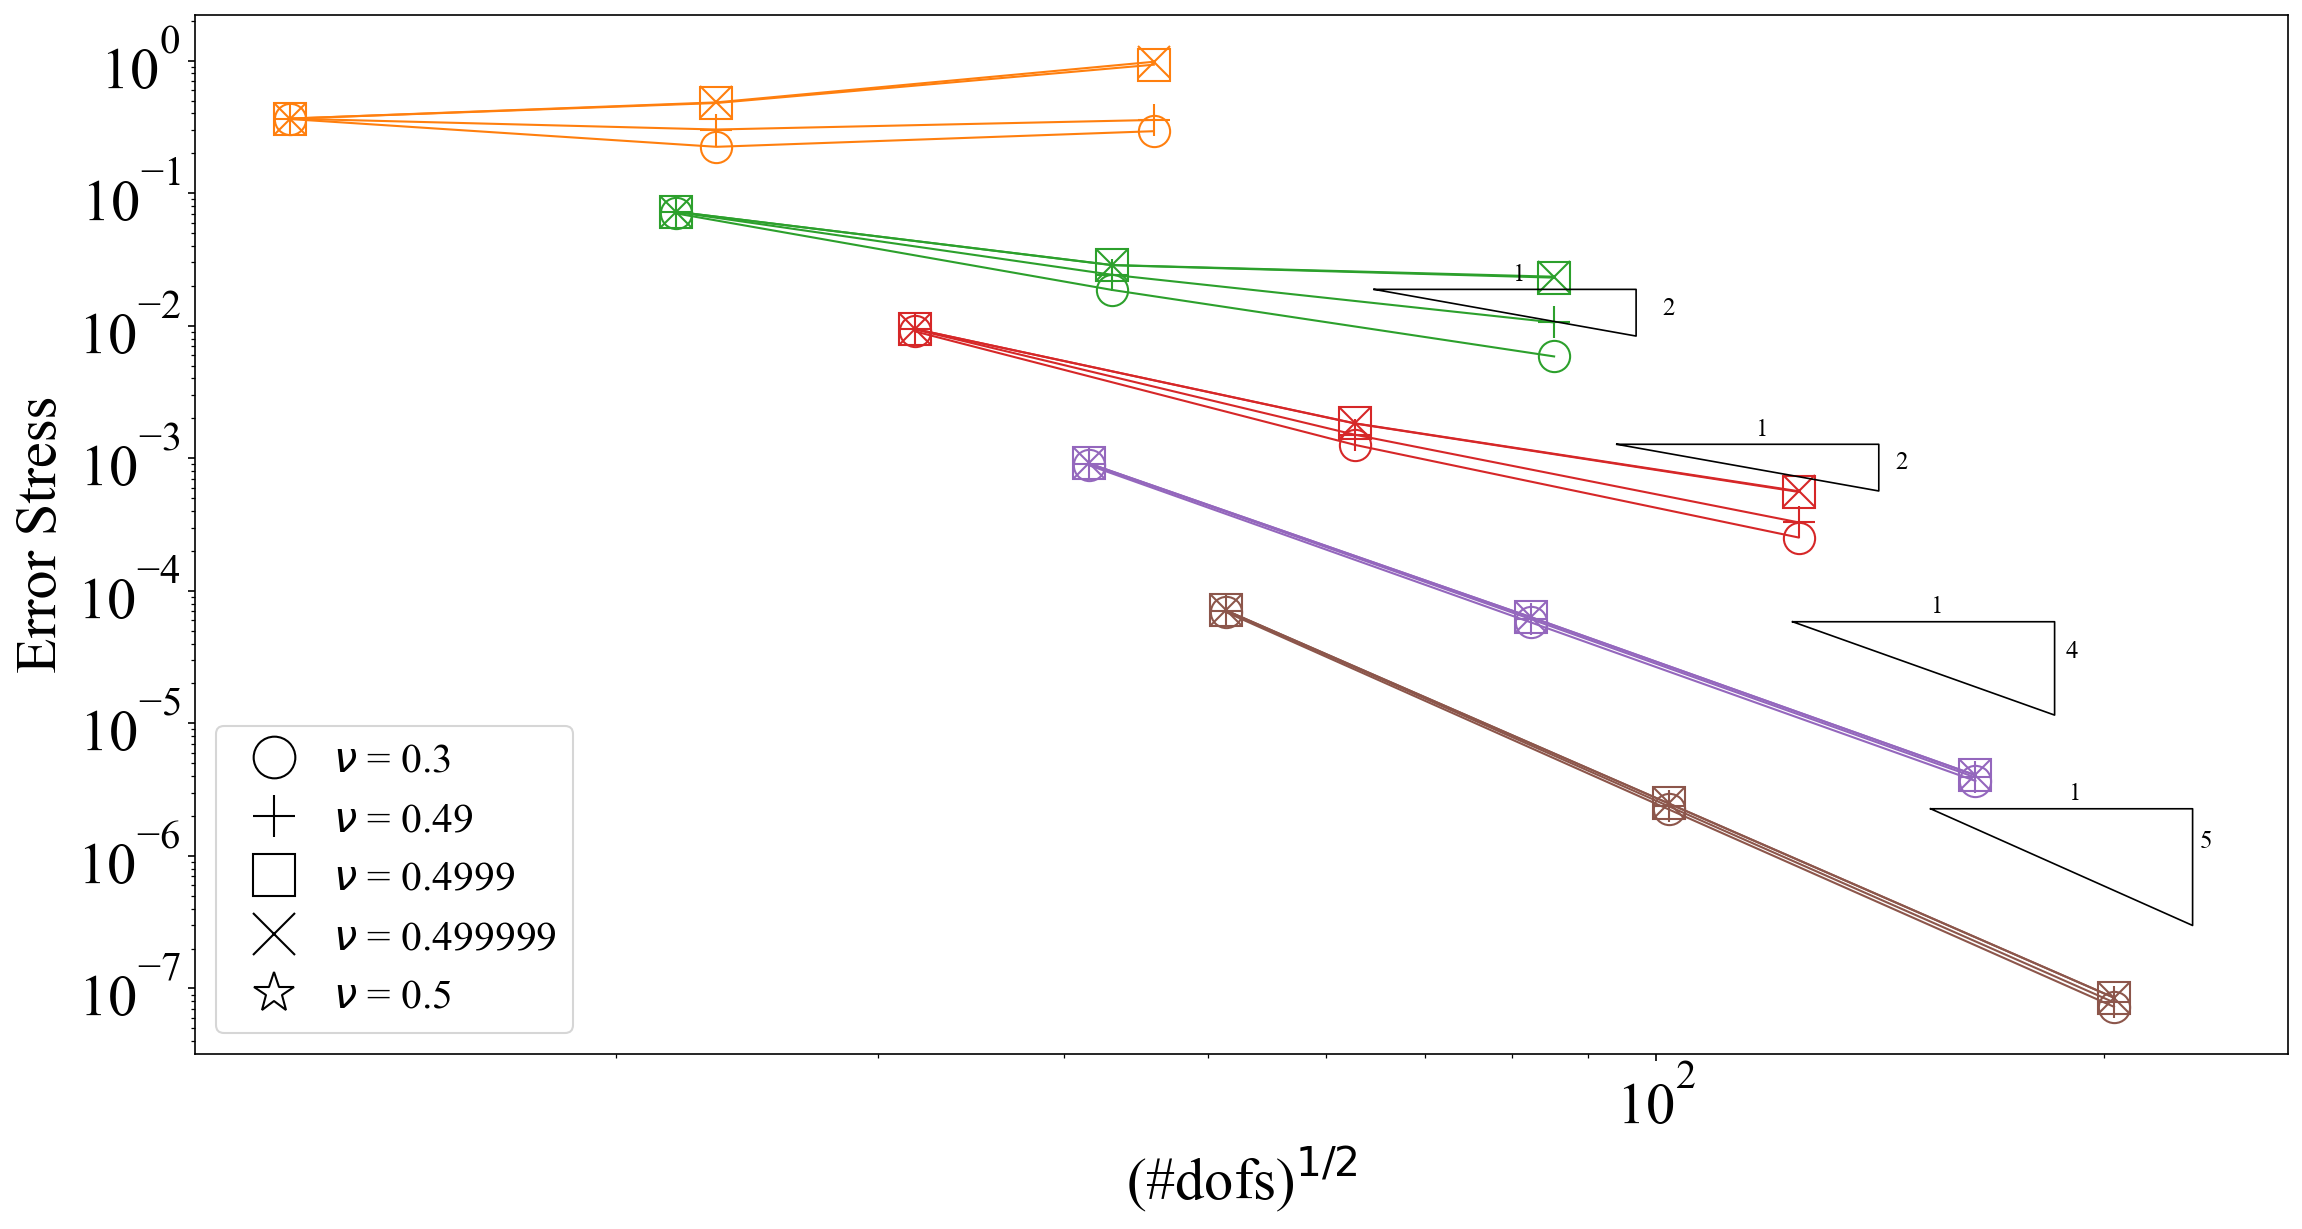

In [70]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 28, 'text.usetex': False})
# 准备绘图
fig, ax2 = plt.subplots(figsize=(18, 9), dpi=150)  # 设置宽度比例
PoiRatio = [0.3, 0.49, 0.4999, 0.499999, 0.5]
markers = {0.3: 'o', 0.49: '+', 0.4999: 's', 0.499999: 'x', 0.5: '*'}
colors = plt.get_cmap('tab10').colors
# 绘制第二张图，使用 errorStress
slope2 = plot_graph(ax2, 'errorStress', PoiRatio,colors,markers,'Error Stress',inclusion_combined_df)



### Linearized

In [664]:
#PoiRatio = [0.3, 0.49, 0.4999, 0.499999, 0.5]
PoiRatio = [0.5]
markers = {0.3: 'o', 0.49: '+', 0.4999: 's', 0.499999: 'x', 0.5: '*'}
colors = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6' , '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']

def plot_graph_linearized(ax, error_column, ylabel,meterialdata,ValidDegree):
    # 按 nu 和 degree 分组，并绘制图表
    PoiRatio = [0.5]
    slope = []
    for i in PoiRatio:
        for j in ValidDegree:
            filtered_df_0 = meterialdata[(meterialdata['degree'] == j) & (meterialdata['nu'] == i)]
            dofs_sqrt = np.sqrt(filtered_df_0['dofs'])

            if len(filtered_df_0) < 3:
                print(f"Not enough data points for degree {j} and nu {i}. Skipping.")
                continue

            ax.plot(dofs_sqrt, filtered_df_0[error_column],
                    marker=markers[i], linestyle='-', color=colors[j], linewidth=4, markerfacecolor=colors[j], markersize=20)
             
            dofs_point_1 = dofs_sqrt.iloc[0]
            dofs_point_2 = dofs_sqrt.iloc[-2]
            dofs_point_3 = dofs_sqrt.iloc[-1]
            #dofs_x = [dofs_point_1, dofs_point_2, dofs_point_3]
              
            error_point_1 = filtered_df_0.iloc[0][error_column]
            error_point_2 = filtered_df_0.iloc[-2][error_column]
            error_point_3 = filtered_df_0.iloc[-1][error_column]
            #error_y = [error_point_1,error_point_2,error_point_3]
            
            slopeEach = np.log(error_point_3/error_point_2) / np.log(dofs_point_3/dofs_point_2)
            slope.append(slopeEach)
            
    print("Calculated slopes:", slope)
    #new_data = constant_combined_df[constant_combined_df['level'] == 0]
    k  = [round(abs(x)) for x in slope]
    #for i in PoiRatio:
    #    filtered_df = meterialdata[(meterialdata['level'] == 0) & (meterialdata['nu'] == i)]
    #    dofs_sqrt = np.sqrt(filtered_df['dofs'])
    #    ax.plot(dofs_sqrt, filtered_df[error_column],
    #            marker=markers[i], linestyle='-', color='black', linewidth=4, markerfacecolor='black',markersize=20)


    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('(#dofs)$^{1/2}$')
    ax.set_ylabel(ylabel)
   
    # 绘制三角形
    
    num = len(ValidDegree)
    for j in range(0,num):
        if k[j] == 0:
            continue
        else:
            filtered_df_03 = meterialdata[(meterialdata['degree'] == ValidDegree[j]) & (meterialdata['nu'] == 0.5)]
            dofs_sqrt_new = np.sqrt(filtered_df_03['dofs'])
    # 已知顶点1和顶点2
            x1 = dofs_sqrt_new.iloc[-2] * 1.2
            x2 = x1 * 1.5

            y1 = filtered_df_03.iloc[-2][error_column] * 1.1
            y2 = filtered_df_03.iloc[-1][error_column] * 1.1

    # 计算第三个顶点 (x3, y3) 使得三角形为等腰直角
            x3 = x2
            d =  (x2/x1)**k[j]
            y3 = y1 / d

    # 定义三角形的三个顶点坐标
            x_coords_new = [x1, x3, x2, x1]  # 回到起点，闭合三角形
            y_coords_new = [y1, y3, y1, y1]

    # 绘制等腰直角三角形
            ax.plot(x_coords_new, y_coords_new, color='black', linewidth=0.8)

            midpoint_1_x = (x1+ x3) / 2 
            midpoint_1_y = y1 * 1.3

            midpoint_2_x = x2 +10
            midpoint_2_y = (y1 +y3) /2

        # 在直角边上分别添加数字
            ax.text(midpoint_1_x, midpoint_1_y, '1', fontsize=12, ha='center', va='center', color='black')  # 在第一条直角边上添加数字'1'
            ax.text(midpoint_2_x, midpoint_2_y, f'{k[j]}', fontsize=12, ha='center', va='center', color='black')  # 在第二条直角边上添加数字'2'
    custom_lines = []
    for j in ValidDegree:
        line = Line2D([0], [0], color=colors[j], marker='*',linestyle='-', markersize=20, label = fr'd = {j}', markerfacecolor=colors[j])
        custom_lines.append(line)
    #custom_lines.append(Line2D([0], [0], color='black', marker='*', linestyle='-', markersize=20, label=r'p-version', markerfacecolor='black'))
    
    # 调整图例
    ax.legend(handles=custom_lines, loc='lower left', fontsize='small', ncol=1, handletextpad=0.4, columnspacing=0.5, bbox_to_anchor=(0, 0))
    ax.plot()
    return slope



#### Neohookean

##### EXP

In [487]:
# 读取CSV文件
#neo_combined1 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_False_exp_degree1.csv')
#neo_combined2 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_False_exp_degree2.csv')
neo_combined3 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_False_exp_degree3.csv')
neo_combined4 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_False_exp_degree4.csv')
neo_combined5 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_False_exp_degree5.csv')

# 将所有数据帧进行拼接
neohookean_exp_data = pd.concat([ neo_combined3, neo_combined4, neo_combined5])

# 打印结果
print(neohookean_exp_data)


   degree   dofs  level   nu    E   gamma  errorDisplacement  errorPressure
0       3    530      0  0.5  1.0  1000.0       1.302494e-03   3.255203e-02
1       3   2018      1  0.5  1.0  1000.0       3.301028e-04   4.329929e-03
2       3   7874      2  0.5  1.0  1000.0       8.428713e-05   5.543200e-04
3       3  31106      3  0.5  1.0  1000.0       2.134844e-05   7.861746e-05
0       4    898      0  0.5  1.0  1000.0       1.433223e-05   5.723868e-03
1       4   3458      1  0.5  1.0  1000.0       8.723931e-07   3.785759e-04
2       4  13570      2  0.5  1.0  1000.0       5.307952e-08   2.399799e-05
3       4  53762      3  0.5  1.0  1000.0       3.258472e-09   1.505185e-06
0       5   1362      0  0.5  1.0  1000.0       3.352350e-07   8.265477e-04
1       5   5282      1  0.5  1.0  1000.0       1.094860e-08   2.719252e-05
2       5  20802      2  0.5  1.0  1000.0       3.495881e-10   8.607408e-07
3       5  82562      3  0.5  1.0  1000.0       1.106188e-11   2.698454e-08


Calculated slopes: [-1.9991498227723463, -4.053928792136492, -5.010155041178924]


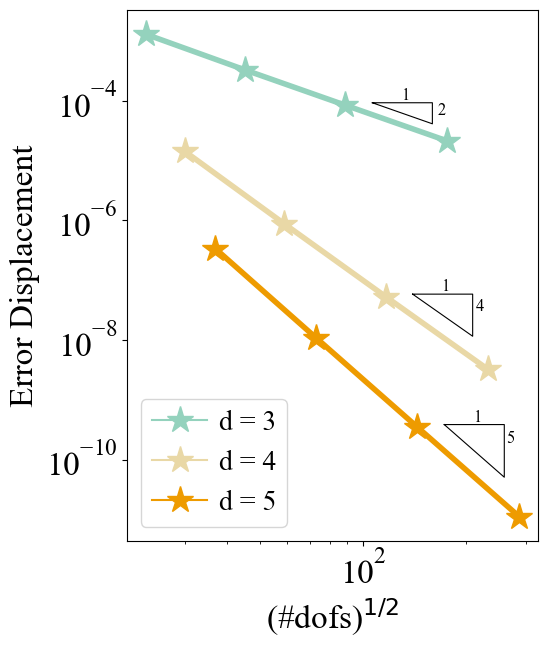

In [665]:
# 更新字体设置
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 24, 'text.usetex': False})
# 绘制第一张图，使用 errorDisplacement
fig, ax1 = plt.subplots(figsize=(6,7), dpi=100)
slope1 = plot_graph_linearized(ax1, 'errorDisplacement', 'Error Displacement', neohookean_exp_data,[3,4,5] )
plt.tight_layout()
plt.show()


Calculated slopes: [-2.8433529951048477, -4.022725266782902, -5.023617447834308]


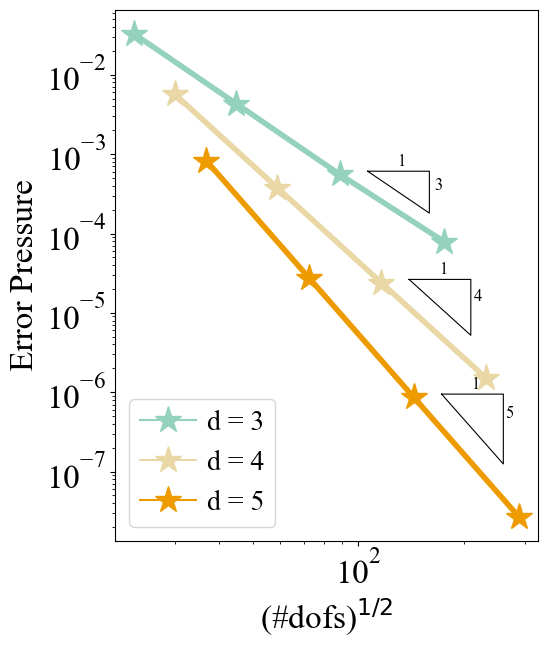

In [666]:
# 更新字体设置
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 24, 'text.usetex': False})
# 绘制第二张图，使用 errorPressure
fig, ax2 = plt.subplots(figsize=(6, 7), dpi=100)
slope2 = plot_graph_linearized(ax2, 'errorPressure', 'Error Pressure',neohookean_exp_data,[3,4,5] )
plt.tight_layout()
plt.show()


##### SIN

In [445]:
# 读取CSV文件
#neo_sin_combined1 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_False_sin_degree1.csv')
#neo_sin_combined2 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/saintvenant_False_degree2.csv')
neo_sin_combined3 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/saintvenant_False_degree3.csv')
neo_sin_combined4 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/saintvenant_False_degree4.csv')
neo_sin_combined5 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/saintvenant_False_degree5.csv')

# 将所有数据帧进行拼接
neo_sin_data = pd.concat([neo_sin_combined3,neo_sin_combined4,neo_sin_combined5])

# 打印结果
print(neo_sin_data)

   degree   dofs  level   nu    E   gamma  errorDisplacement  errorPressure
0       3    530      0  0.5  1.0  1000.0           0.085134       0.051672
1       3   2018      1  0.5  1.0  1000.0           0.020283       0.020374
2       3   7874      2  0.5  1.0  1000.0           0.005043       0.009966
0       4    898      0  0.5  1.0  1000.0           0.013433       0.007817
1       4   3458      1  0.5  1.0  1000.0           0.000857       0.000496
2       4  13570      2  0.5  1.0  1000.0           0.000051       0.000030
0       5   1362      0  0.5  1.0  1000.0           0.001573       0.000958
1       5   5282      1  0.5  1.0  1000.0           0.000058       0.000036
2       5  20802      2  0.5  1.0  1000.0           0.000002       0.000001


Calculated slopes: [-2.0444826831376157, -4.1304816876518595, -4.916402812525185]


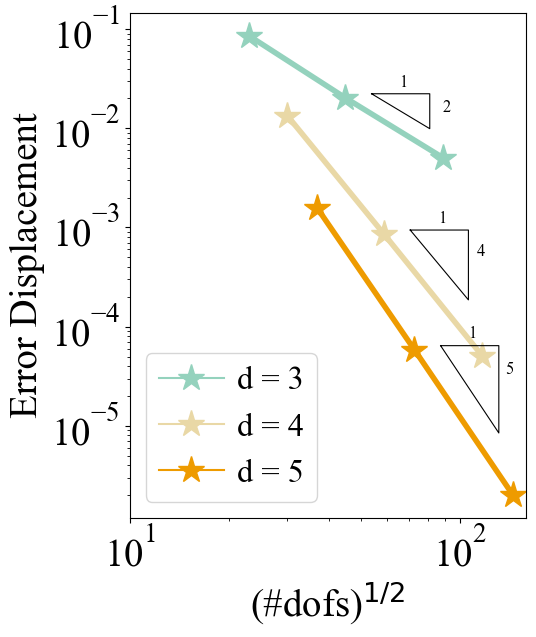

In [667]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 28, 'text.usetex': False})
# 绘制第一张图，使用 errorDisplacement
fig, ax1 = plt.subplots(figsize=(6, 7), dpi=100)
slope1 = plot_graph_linearized(ax1, 'errorDisplacement', 'Error Displacement', neo_sin_data,[3,4,5])
ax1.set_xticks(ax1.get_xticks()[1:3]) 
plt.tight_layout()
plt.show()

Calculated slopes: [-1.0504619349090412, -4.124014724267455, -4.895723065057834]


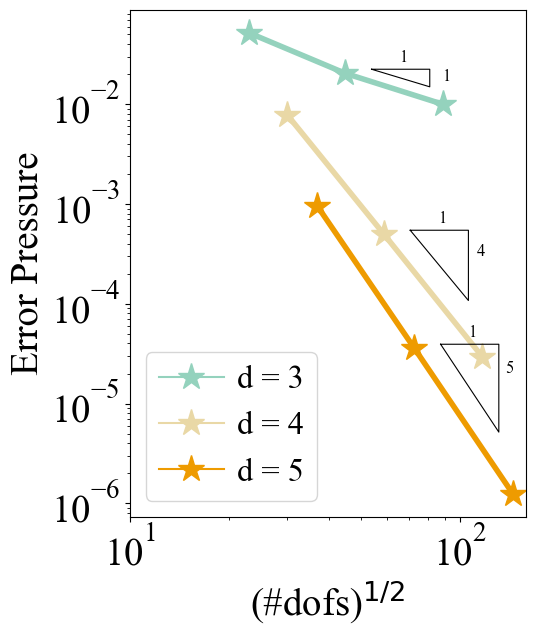

In [672]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 28, 'text.usetex': False})
# 绘制第一张图，使用 errorDisplacement
fig, ax2 = plt.subplots(figsize=(6, 7), dpi=100)
slope1 = plot_graph_linearized(ax2, 'errorPressure', 'Error Pressure', neo_sin_data,[3,4,5] )
ax2.set_xticks(ax2.get_xticks()[1:3])

plt.tight_layout()
plt.show()

#### HO

### Fully Nonlinear

In [673]:
#PoiRatio = [0.3, 0.49, 0.4999, 0.499999, 0.5]

def plot_graph_nonlinear(ax, error_column, ylabel, materialdata,ValidDegree):
    # 按 nu 和 degree 分组，并绘制图表
    PoiRatio = [0.5]
    markers = {0.3: 'o', 0.49: '+', 0.4999: 's', 0.499999: 'x', 0.5: '*'}
    colors = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6' , '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']

    slope = []
    for i in PoiRatio:
        for j in ValidDegree:
            filtered_df_0 = materialdata[(materialdata['degree'] == j) & (materialdata['nu'] == i)]
            dofs_sqrt = np.sqrt(filtered_df_0['dofs'])

            if len(filtered_df_0) < 2:
                print(f"Not enough data points for degree {j} and nu {i}. Skipping.")
                continue

            ax.plot(dofs_sqrt, filtered_df_0[error_column],
                    marker=markers[i], linestyle='-', color=colors[j], linewidth=4, markerfacecolor=colors[j], markersize=20)
             
            dofs_point_1 = dofs_sqrt.iloc[-2]
            dofs_point_2 = dofs_sqrt.iloc[-1]
            #dofs_point_3 = dofs_sqrt.iloc[2]
            #dofs_x = [dofs_point_1, dofs_point_2, dofs_point_3]
              
            error_point_1 = filtered_df_0.iloc[-2][error_column]
            error_point_2 = filtered_df_0.iloc[-1][error_column]
            #error_point_3 = filtered_df_0.iloc[2][error_column]

            slopeEach = np.log(error_point_2/error_point_1) / np.log(dofs_point_2/dofs_point_1)
            slope.append(slopeEach)
            
    print("Calculated slopes:", slope)
    #new_data = constant_combined_df[constant_combined_df['level'] == 0]
    k = [round(abs(x)) for x in slope]
    
# refinement =0    
    #for i in PoiRatio:
    #    filtered_df = materialdata[(materialdata['level'] == 0) & (materialdata['nu'] == i)]
    #    dofs_sqrt = np.sqrt(filtered_df['dofs'])
    #    ax.plot(dofs_sqrt, filtered_df[error_column],
    #            marker=markers[i], linestyle='-', color='black', linewidth=4, markerfacecolor='black', markersize=20)

# 调整图例
    custom_lines = []
    for j in ValidDegree:
        line = Line2D([0], [0], color=colors[j], marker='*',linestyle='-', markersize=10, label = fr'd = {j}', markerfacecolor=colors[j])
        custom_lines.append(line)
    #custom_lines.append(Line2D([0], [0], color='black', marker='*', linestyle='-', markersize=10, label=r'p-version', markerfacecolor='black'))
    ax.legend(handles=custom_lines, loc='upper right', fontsize='small', ncol=1, handletextpad=0.4, columnspacing=0.5, bbox_to_anchor=(1, 1))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('(#dofs)$^{1/2}$')
    ax.set_ylabel(ylabel)
    
    
    #绘制三角形
    num = len(ValidDegree)
    for j in range(0,num):
        if k[j] == 0:
            continue
        else:
            filtered_df_03 = materialdata[(materialdata['degree'] == ValidDegree[j]) & (materialdata['nu'] == 0.5)
        ]
            dofs_sqrt_new = np.sqrt(filtered_df_03['dofs'])

    # 已知顶点1和顶点2
        x1 = dofs_sqrt_new.iloc[-2] * 1.2
        x2 = x1 * 1.5

        y1 = filtered_df_03.iloc[-2][error_column] * 1.1
        y2 = filtered_df_03.iloc[-1][error_column] * 1.1

    # 计算第三个顶点 (x3, y3) 使得三角形为等腰直角
        x3 = x2
        d =  (x2/x1)**k[j]
        y3 = y1 / d

    # 定义三角形的三个顶点坐标
        x_coords_new = [x1, x3, x2, x1]  # 回到起点，闭合三角形
        y_coords_new = [y1, y3, y1, y1]

    # 绘制等腰直角三角形
        ax.plot(x_coords_new, y_coords_new, color='black', linewidth=0.8)

        midpoint_1_x = (x1+ x3) / 2 
        midpoint_1_y = y1 * 1.3

        midpoint_2_x = x2 +10
        midpoint_2_y = (y1 +y3) /2

        # 在直角边上分别添加数字
        ax.text(midpoint_1_x, midpoint_1_y, '1', fontsize=12, ha='center', va='center', color='black')  # 在第一条直角边上添加数字'1'
        ax.text(midpoint_2_x, midpoint_2_y, f'{k[j]}', fontsize=12, ha='center', va='center', color='black')  # 在第二条直角边上添加数字'2'
    return slope


#### NeoHookean

##### EXP

In [397]:
# 读取CSV文件
#neo_nonlinear_combined1 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_True_degree1.csv')
#neo_nonlinear_combined2 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_True_degree2.csv')
neo_nonlinear_combined3 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_True_exp_degree3.csv')
neo_nonlinear_combined4 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_True_exp_degree4.csv')
neo_nonlinear_combined5 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_True_exp_degree5.csv')

# 将所有数据帧进行拼接
neohookean_nonlinear_exp_data = pd.concat([neo_nonlinear_combined3, neo_nonlinear_combined4, neo_nonlinear_combined5])
# 打印结果
print(neohookean_nonlinear_exp_data)


   degree   dofs  level   nu    E   gamma  errorDisplacement  errorPressure  \
0       3    530      0  0.5  1.0  1000.0       4.270542e+00   1.375153e-01   
1       3   2018      1  0.5  1.0  1000.0       4.248197e-01   1.703107e-02   
2       3   7874      2  0.5  1.0  1000.0       1.231155e-04   7.657814e-04   
3       3  31106      3  0.5  1.0  1000.0       4.254669e-05   1.093863e-04   
0       4    898      0  0.5  1.0  1000.0       4.395246e-04   8.811365e-03   
1       4   3458      1  0.5  1.0  1000.0       1.410886e-04   5.590221e-04   
2       4  13570      2  0.5  1.0  1000.0       4.250438e-07   3.554487e-05   
3       4  53762      3  0.5  1.0  1000.0       8.914003e-08   2.231064e-06   
0       5   1362      0  0.5  1.0  1000.0       5.323918e-05   1.281424e-03   
1       5   5282      1  0.5  1.0  1000.0       1.084247e-06   3.993953e-05   
2       5  20802      2  0.5  1.0  1000.0       1.219658e-07   1.266509e-06   
3       5  82562      3  0.5  1.0  1000.0       2.19

Calculated slopes: [-1.5467962238240256, -2.2691620257413265, -9.169837166918766]


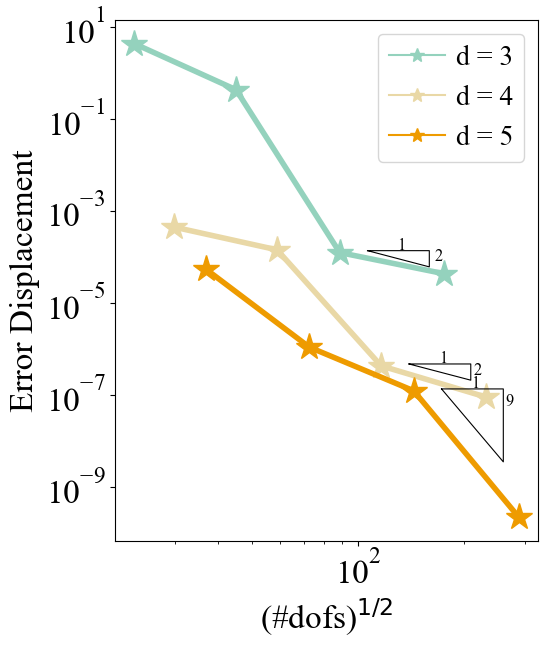

In [674]:
# 更新字体设置
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 24, 'text.usetex': False})
fig, ax1 = plt.subplots(figsize=(6, 7), dpi=100)
slope1 = plot_graph_nonlinear(ax1, 'errorDisplacement', 'Error Displacement', neohookean_nonlinear_exp_data,[3,4,5])
plt.tight_layout()
plt.show()


Calculated slopes: [-2.8329626357007935, -4.021655390358941, -5.022968238362442]


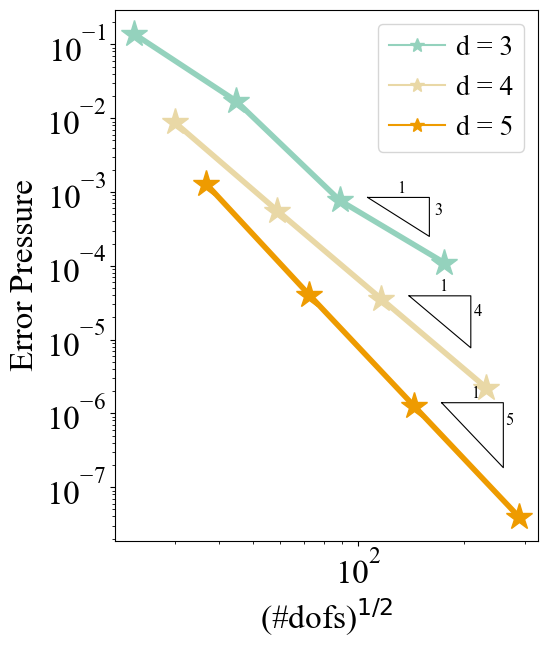

In [675]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 24, 'text.usetex': False})
# 绘制第二张图，使用 errorPressure
fig, ax2 = plt.subplots(figsize=(6, 7), dpi=100)
slope2 = plot_graph_nonlinear(ax2, 'errorPressure', 'Error Pressure', neohookean_nonlinear_exp_data,[3,4,5])
plt.tight_layout()
plt.show()


Calculated slopes: [-2.8329593148541226, -4.021526902769594, -5.022708971287541]


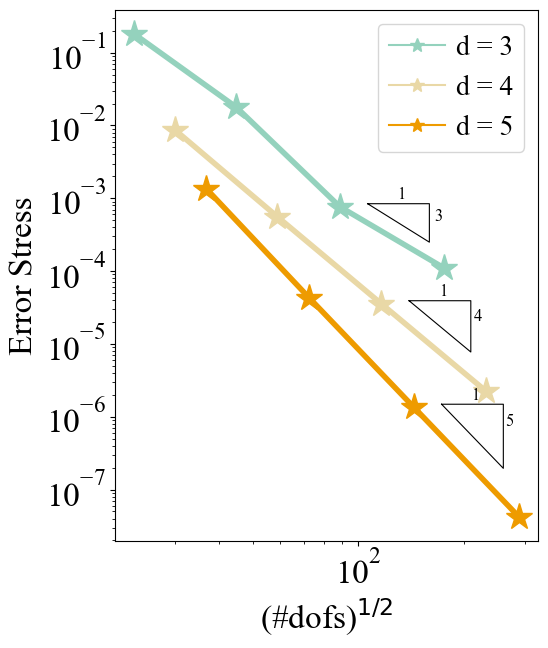

In [676]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 24, 'text.usetex': False})
# 绘制第三张图，使用 errorStress
fig, ax3 = plt.subplots(figsize=(6, 7), dpi=100)
slope3 = plot_graph_nonlinear(ax3, 'errorStress', 'Error Stress',neohookean_nonlinear_exp_data,[3,4,5])
plt.tight_layout()
plt.show()


Calculated slopes: [-2.799460240353649, -5.629006163272796, -6.676280456433524]


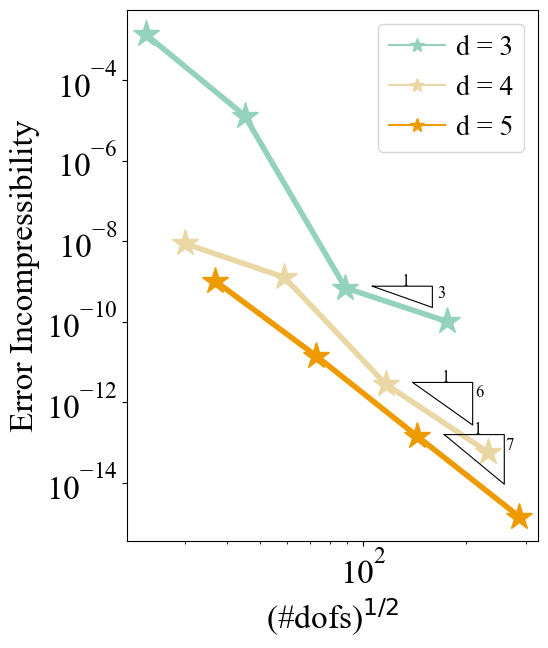

In [677]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 24, 'text.usetex': False})
# 绘制第四张图，使用 errorIncompressibility
fig, ax4 = plt.subplots(figsize=(6, 7), dpi=100)
slope4 = plot_graph_nonlinear(ax4, 'errorIncompressibility', 'Error Incompressibility',neohookean_nonlinear_exp_data,[3,4,5])
plt.tight_layout()
plt.show()


##### SIN

In [682]:
# 读取CSV文件
#neo_nonlinear_sin_combined1 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/saintvenant_True_degree1.csv')
neo_nonlinear_sin_combined2 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_True_sin_degree2.csv')
neo_nonlinear_sin_combined3 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_True_sin_degree3.csv')
neo_nonlinear_sin_combined4 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_True_sin_degree4.csv')
neo_nonlinear_sin_combined5 = pd.read_csv('/Users/caihongye/Desktop/MMSCDissertatioon/MMSC24-Cai/code/neohookean_True_sin_degree5.csv')

# 将所有数据帧进行拼接
neo_nonlinear_sin_data = pd.concat([neo_nonlinear_sin_combined2,neo_nonlinear_sin_combined3,neo_nonlinear_sin_combined4,neo_nonlinear_sin_combined5])
# 打印结果
print(neo_nonlinear_sin_data)


   degree   dofs  level   nu    E   gamma  errorDisplacement  errorPressure  \
0       2    258      0  0.5  1.0  1000.0       1.150208e+00   4.379349e-01   
0       3    530      0  0.5  1.0  1000.0       9.226054e-02   7.492619e-02   
0       4    898      0  0.5  1.0  1000.0       2.013371e-02   1.384493e-02   
1       4   3458      1  0.5  1.0  1000.0       3.882438e-02   6.506501e-03   
2       4  13570      2  0.5  1.0  1000.0       7.019686e-05   5.125599e-05   
3       4  53762      3  0.5  1.0  1000.0       6.995778e-06   3.070421e-06   
0       5   1362      0  0.5  1.0  1000.0       7.559513e-03   2.077052e-03   
1       5   5282      1  0.5  1.0  1000.0       3.858107e-04   7.049209e-05   
2       5  20802      2  0.5  1.0  1000.0       2.826945e-06   2.250018e-06   
3       5  82562      3  0.5  1.0  1000.0       1.400613e-07   7.343370e-08   

    errorStress  errorIncompressibility  
0  4.420404e-01                0.009447  
0  7.497177e-02                0.009099  
0  1

Calculated slopes: [-3.3500220250840442, -4.359624268246539]


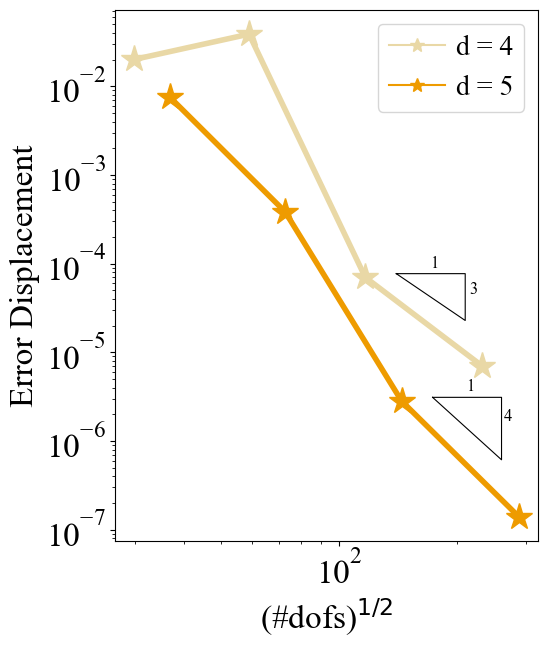

In [683]:
# 更新字体设置
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 24, 'text.usetex': False})
fig, ax1 = plt.subplots(figsize=(6, 7), dpi=100)
slope1 = plot_graph_nonlinear(ax1, 'errorDisplacement', 'Error Displacement', neo_nonlinear_sin_data,[4,5])
plt.tight_layout()
plt.show()


Calculated slopes: [-4.089498919039706, -4.965266184713178]


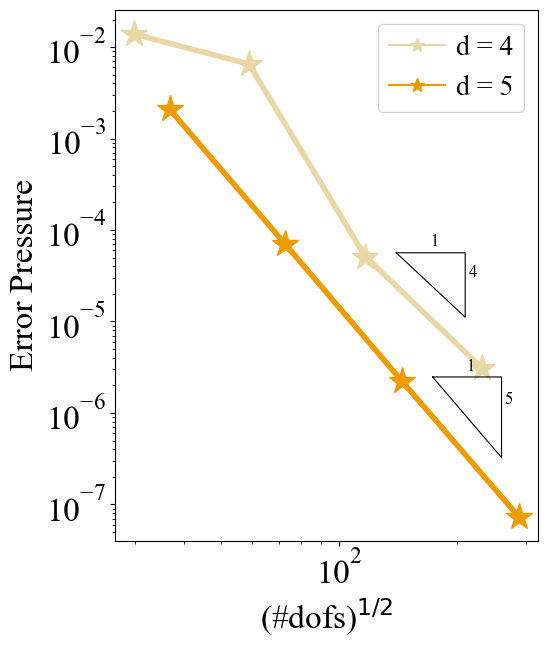

In [679]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 24, 'text.usetex': False})
# 绘制第二张图，使用 errorPressure
fig, ax2 = plt.subplots(figsize=(6, 7), dpi=100)
slope2 = plot_graph_nonlinear(ax2, 'errorPressure', 'Error Pressure', neo_nonlinear_sin_data,[4,5])
plt.tight_layout()
plt.show()


Calculated slopes: [-4.086548965985455, -4.963373672498058]


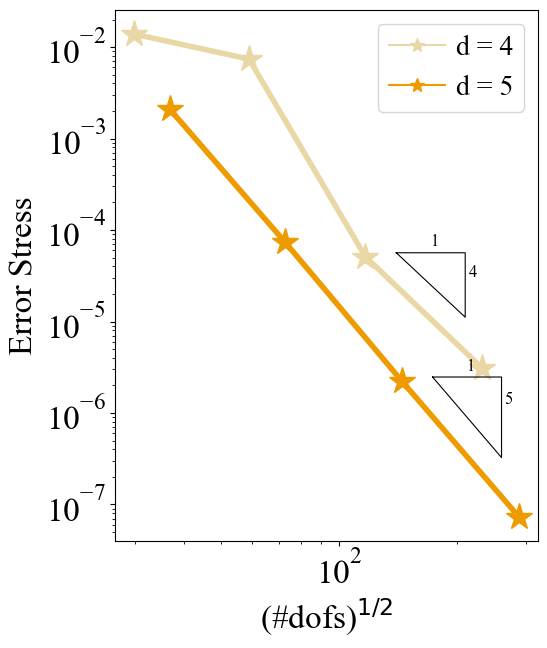

In [680]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 24, 'text.usetex': False})
# 绘制第三张图，使用 errorStress
fig, ax3 = plt.subplots(figsize=(6, 7), dpi=100)
slope3 = plot_graph_nonlinear(ax3, 'errorStress', 'Error Stress',neo_nonlinear_sin_data,[4,5])
plt.tight_layout()
plt.show()


Calculated slopes: [8.301974264496027e-10, 1.496726793447416e-12]


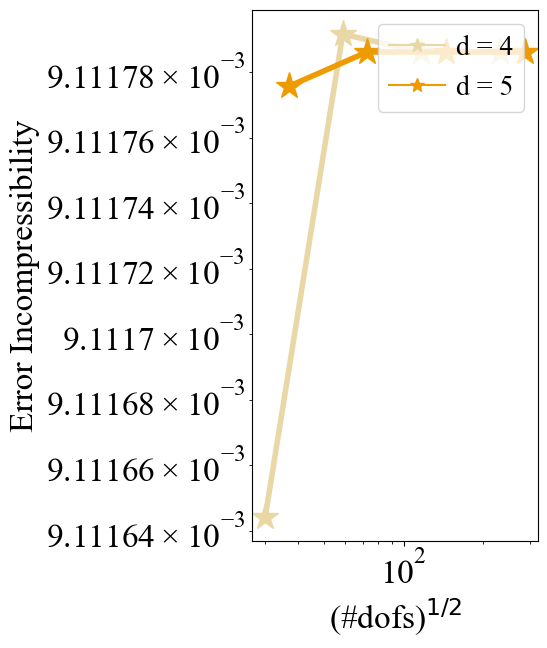

In [681]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 24, 'text.usetex': False})
# 绘制第四张图，使用 errorIncompressibility
fig, ax4 = plt.subplots(figsize=(6, 7), dpi=100)
slope4 = plot_graph_nonlinear(ax4, 'errorIncompressibility', 'Error Incompressibility',neo_nonlinear_sin_data,[4,5])
plt.tight_layout()

plt.show()


#### HO

### mesh

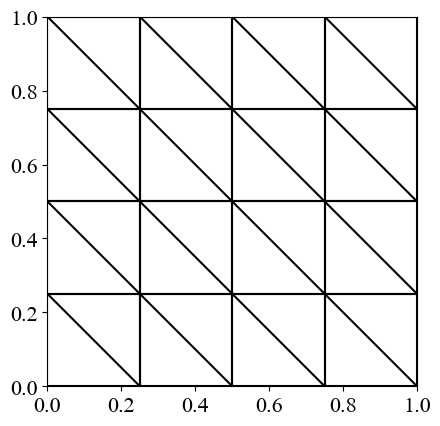

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个 4x4 的网格
n = 4
x = np.linspace(0, 1, n + 1)
y = np.linspace(0, 1, n + 1)

# 创建图形和坐标轴
fig, ax = plt.subplots()

# 画出每个小方格的对角线
for i in range(n):
    for j in range(n):
        # 画出每个小方格的四条边
        ax.plot([x[i], x[i+1]], [y[j], y[j]], color='black')
        ax.plot([x[i+1], x[i+1]], [y[j], y[j+1]], color='black')
        ax.plot([x[i+1], x[i]], [y[j+1], y[j+1]], color='black')
        ax.plot([x[i], x[i]], [y[j+1], y[j]], color='black')
        
        # 画出对角线
        ax.plot([x[i], x[i+1]], [y[j+1], y[j]], color='black')

# 设置坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# 设置坐标轴标签
#ax.set_xlabel('x')
#ax.set_ylabel('y')

# 显示图形
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


### variable Coeffient

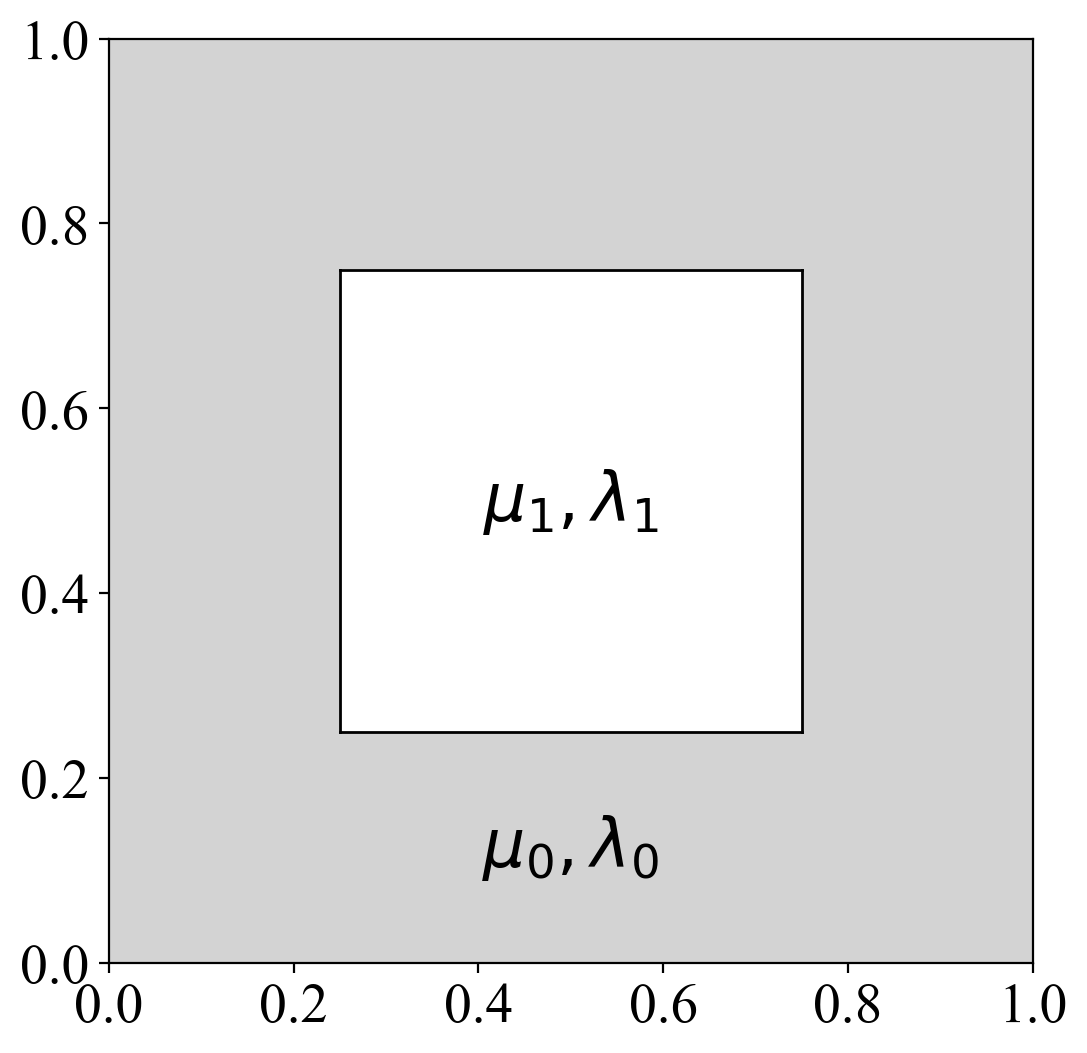

In [621]:
import matplotlib.pyplot as plt
import numpy as np

# 设置坐标范围
x = np.linspace(0, 1, 400)
y = np.linspace(0, 1, 400)
X, Y = np.meshgrid(x, y)

# 定义中心区域
center_region = (np.abs(X - 0.5) < 0.25) & (np.abs(Y - 0.5) < 0.25)

# 创建图形
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 20, 'text.usetex': False})
plt.figure(figsize=(6, 6),dpi=200)

# 绘制中心区域和其他区域
plt.contourf(X, Y, center_region, levels=[-0.5, 0.5], colors=['lightgrey', 'blue'])

# 在中心区域添加文字描述
#plt.text(0.5, 0.5, r'$\nu_1=0.5$ ', color='black', fontsize=14, 
         #ha='center', va='center')
plt.text(0.5, 0.5, r'$\mu_1, \lambda_1$', color='black', fontsize=24, 
         ha='center', va='center')
plt.text(0.5, 0.125, r'$\mu_0,\lambda_0$', color='black', fontsize=24, 
         ha='center', va='center')

# 绘制网格和轴线
plt.plot([0.25, 0.25], [0.25, 0.75], color='black', linestyle='-', linewidth=1)
plt.plot([0.75, 0.75], [0.25, 0.75], color='black', linestyle='-', linewidth=1)
plt.plot([0.25, 0.75], [0.25, 0.25], color='black', linestyle='-', linewidth=1)
plt.plot([0.25, 0.75], [0.75, 0.75], color='black', linestyle='-', linewidth=1)
#plt.plot([0.5, 0.5], [0.25, 0.75], color='black', linewidth=0.5)
#plt.plot([0.25, 0.75], [0.5, 0.5], color='black', linewidth=0.5)

# 设置坐标轴
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')

# 设置标题
#plt.title(r'$\nu=0.5, \lambda=\infty$')

# 显示图形
plt.show()


### newton iteration error

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import matplotlib as mpl

def plot_residual_relation(degrees, levels, exact_solution, basepath="output"):
    """
    Plot the log-log relationship of Newton residuals
    
    Parameters:
    degrees -- list of polynomial degrees to plot (e.g., [3, 4, 5])
    levels -- list of mesh refinement levels (e.g., [0, 1])
    exact_solution -- exact solution type: 'sin' or 'exp'
    basepath -- path to directory containing residual files (default: "output")
    """
    # Helper function to load residual data
    def load_residual(deg, lev, sol_type):
        fname = pathlib.Path(basepath) / f"residual_deg{deg}_lev{lev}_{sol_type}.txt"
        if fname.exists():
            return np.loadtxt(fname)
        return None

    # Collect data curves
    curves = []  # format: (label, residual array)
    for k in degrees:
        for lev in levels:
            res = load_residual(k, lev, exact_solution)
            if res is not None and len(res) > 1:
                label = f"d={k}, level={lev}"
                curves.append((label, res))
    
    if not curves:
        print(f"Warning: No valid residual data found in {basepath} for exact solution '{exact_solution}'!")
        print(f"Please check existence of these files:")
        for k in degrees:
            for lev in levels:
                print(f"  - residual_deg{k}_lev{lev}_{exact_solution}.txt")
        return None

    # Create figure
    plt.figure(figsize=(17, 10))
    
    # Plot each curve
    markers = ['o', 's', '^']  # marker styles
    colors = plt.cm.tab10(np.linspace(0, 1, len(curves)))  # color palette
    
    for i, (label, res) in enumerate(curves):
        x = np.log10(res[:-1])
        y = np.log10(res[1:])
        plt.plot(x, y, marker=markers[i % len(markers)], 
                 linestyle='-', color=colors[i],
                 markersize=8, label=label,linewidth = 3)
    
    # Add reference lines using first point of first curve
    if curves:
        x0 = np.log10(curves[0][1][0])
        y0 = np.log10(curves[0][1][1])
        
        # Determine x-range for reference lines
        all_x = []
        for _, res in curves:
            all_x.extend(np.log10(res[:-1]))
        
        if all_x:
            x_ref = np.linspace(min(all_x), max(all_x), 100)
            
            # Quadratic convergence reference: y = 2x + c
            c_quad = y0 - 2 * x0
            plt.plot(x_ref, 2 * x_ref + c_quad, 'k--', linewidth=1.5, 
                     label=r'$y = 2x + c$ (quadratic reference)')
            
            # Linear convergence reference: y = x + c
            c_linear = y0 - x0
            plt.plot(x_ref, x_ref + c_linear, 'r-.', linewidth=1.5, 
                     label=r'$y = x + c$ (linear reference)')
    
    # Configure plot
    plt.xlabel(r'$\log_{10} r_k$', fontsize=30)
    plt.ylabel(r'$\log_{10} r_{k+1}$', fontsize=30)
    
    # Generate title
    deg_str = ", ".join(map(str, degrees))
    lev_str = ", ".join(map(str, levels))
    #plt.title(f'Newton Residual Relation for $u_{{exact,{exact_solution}}}  $\nDegrees: {deg_str} | Levels: {lev_str}',          fontsize=20)
    
    plt.legend(fontsize=20)
    plt.grid(True, which='both', alpha=0.3)
    plt.tight_layout()
    
    # Display plot
    plt.show()
    return plt.gcf()  # return figure object for further manipulation

#### sine

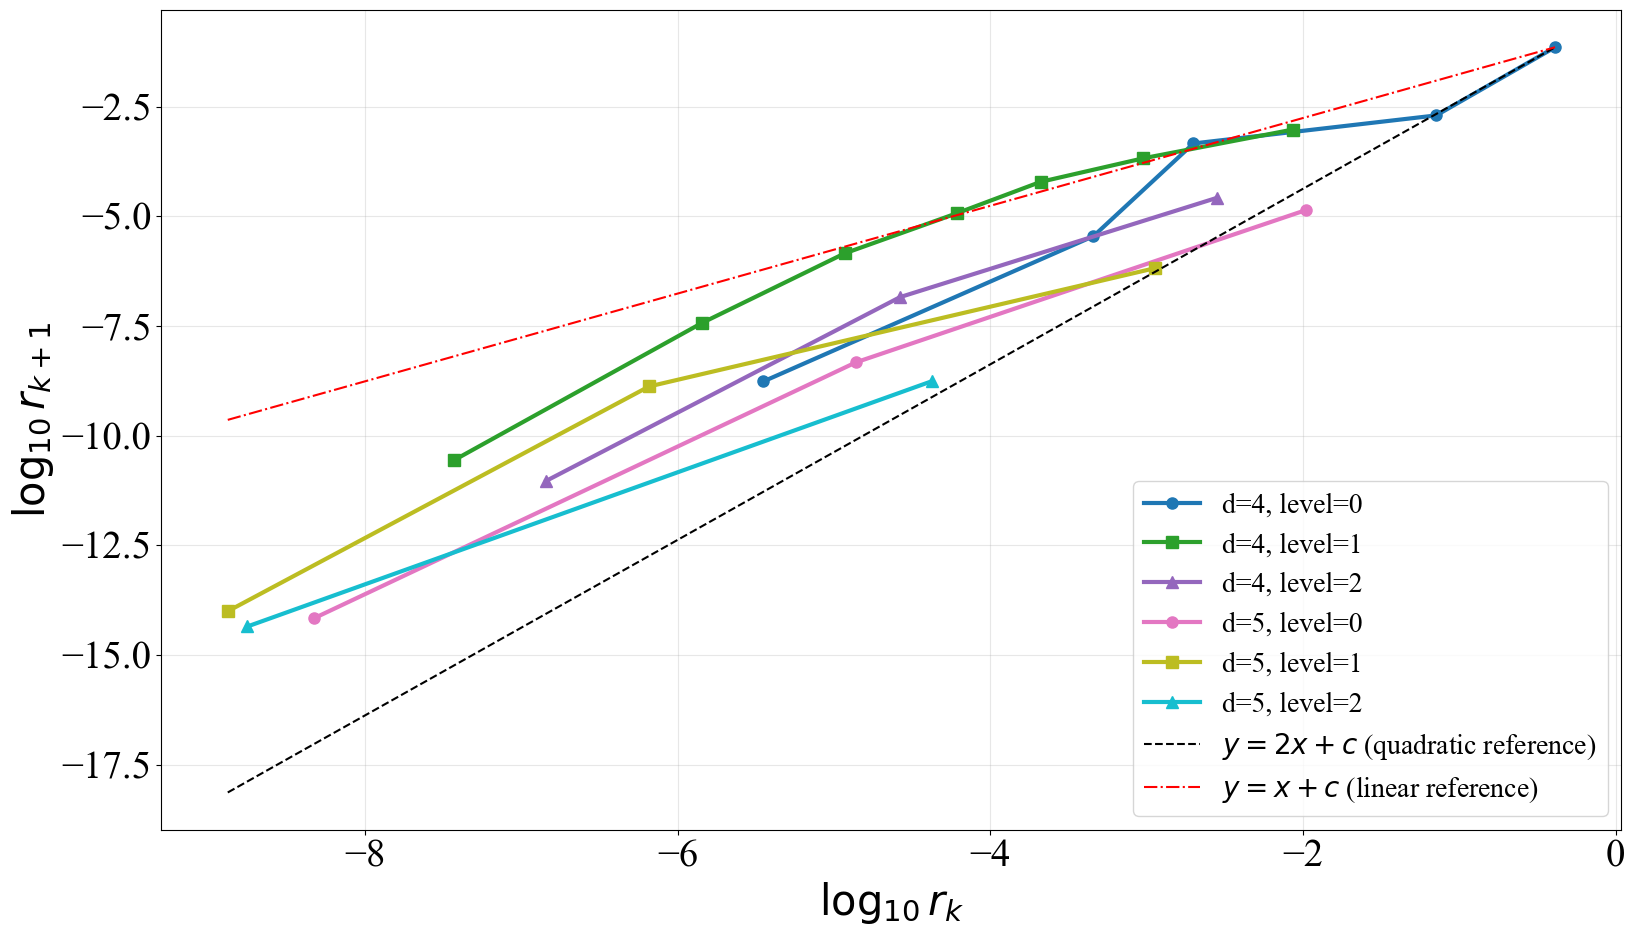

<Figure size 640x480 with 0 Axes>

In [169]:
# Example usage:
if __name__ == "__main__":
    # Set parameters
    degrees = [3, 4, 5]  # polynomial degrees to compare
    levels = [0,1,2]         # mesh refinement levels
    exact_solution = "sin"  # or "sin"
    
    # Generate plot
    plot_residual_relation(degrees, levels, exact_solution)

#### exp

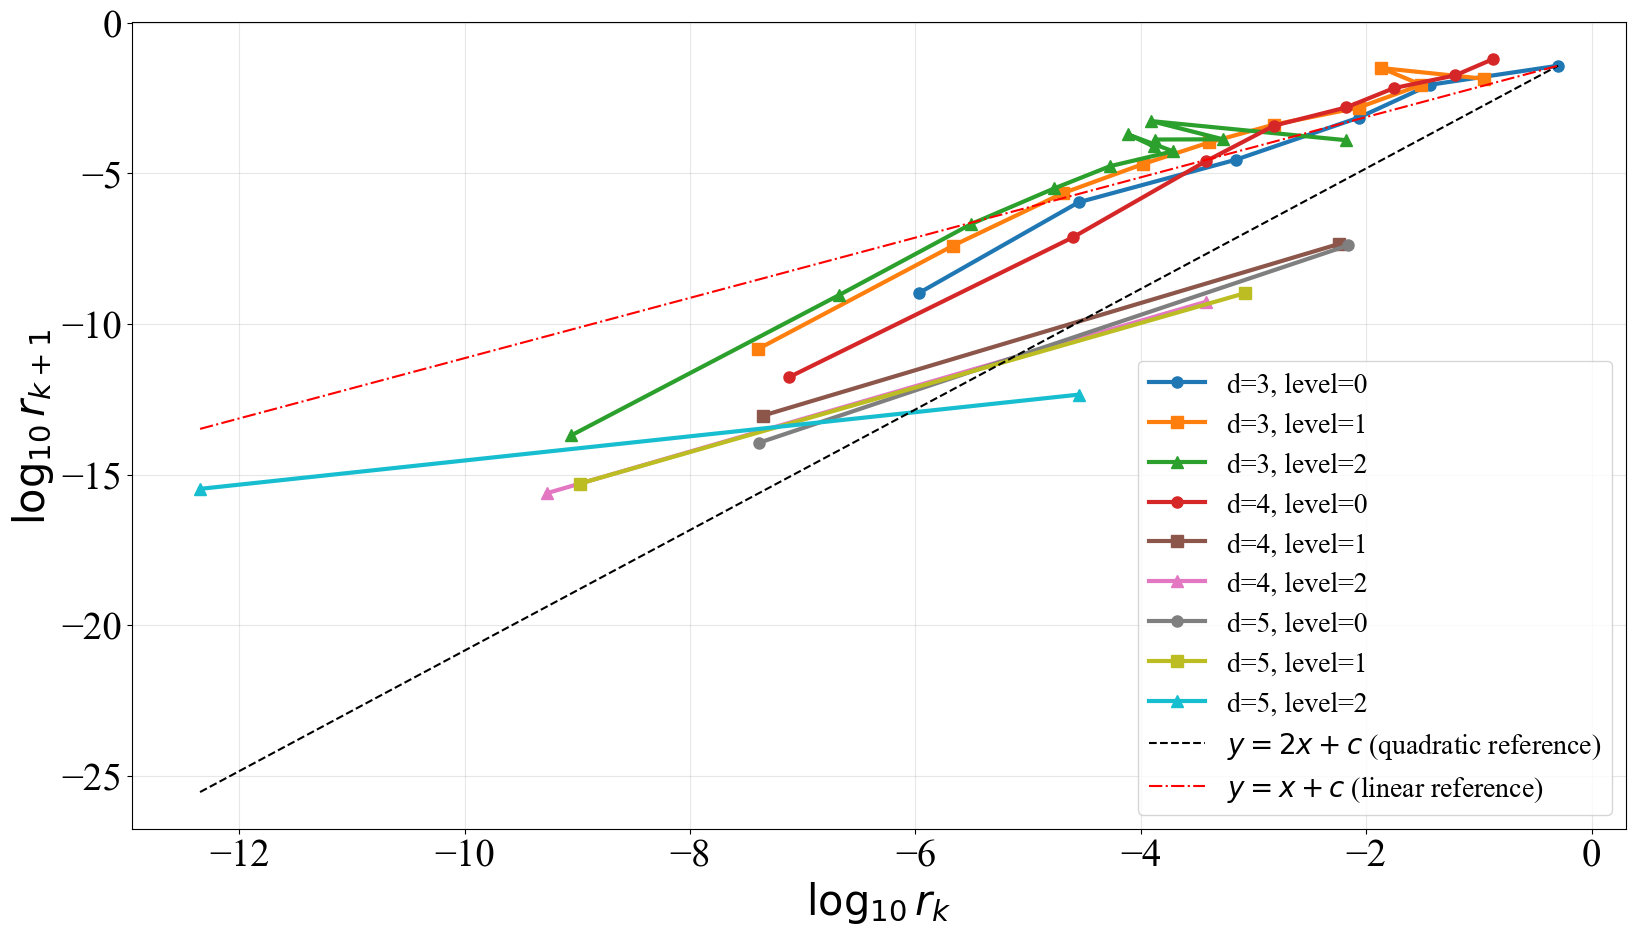

<Figure size 640x480 with 0 Axes>

In [170]:
# Example usage:
if __name__ == "__main__":
    # Set parameters
    degrees = [3, 4, 5]  # polynomial degrees to compare
    levels = [0,1,2]         # mesh refinement levels
    exact_solution = "exp"  # or "sin"
    
    # Generate plot
    plot_residual_relation(degrees, levels, exact_solution)